# Data science Lab 2 

## Unsupervised anomaly detection in content delivery network log analytics

### Shahid Gulzar Padder 
###### Neptun id: XPXSKK

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset and EDA

In [2]:
dataset = pd.read_csv('CDN anomaly detection dataset .csv')# No delimiter like ","or ";"

In [3]:
dataset

Channel ID                contenttype  protocol  contentlength  \
0              206                 video/mp4  HTTP/1.1   13392.936510   
1              502                 text/html  HTTP/1.1       2.634921   
2              403  text/html; charset=utf-8  HTTP/1.0       2.619048   
3              412                 text/html  HTTP/1.1      23.888889   
4              412                 text/html  HTTP/1.1      23.888889   
...            ...                       ...       ...            ...   
30360          403  text/html; charset=utf-8  HTTP/1.0       2.619048   
30361          502                 text/html  HTTP/1.1       2.634921   
30362          206                 video/mp4  HTTP/1.1   64225.714290   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   
30364          304           application/zip  HTTP/1.1       0.000000   

       timefirstbyte  timetoserv      maxage  osfamily       sid  \
0           0.000150    0.000689  31536000.0       0.0  153806.0   
1           0.020632    0.020684         NaN       1.0  165279.0   
2           0.000052    0.000120         NaN       NaN  432213.0   
3           0.014797    0.014842         NaN       NaN  207847.0   
4           0.014794    0.014847         NaN       0.0  234088.0   
...              ...         ...         ...       ...       ...   
30360       0.000056    0.000139         NaN       NaN  197138.0   
30361       8.387374    8.387429         NaN       1.0  234350.0   
30362       0.000143    2.302989  31536000.0       0.0   93673.0   
30363       0.000023    0.000081         NaN       NaN       NaN   
30364       0.000199    0.000258       300.0       3.0   26296.0   

                           cachecontrol  ...  fragment      path  \
0        Cache-Control:max-age=31536000  ...     False   3931298   
1                        Cache-Control:  ...     False        92   
2                        Cache-Control:  ...     False   3896814   
3                        Cache-Control:  ...     False  21936373   
4                        Cache-Control:  ...     False  25178360   
...                                 ...  ...       ...       ...   
30360                    Cache-Control:  ...     False   3896667   
30361                    Cache-Control:  ...     False       413   
30362    Cache-Control:max-age=31536000  ...     False   3667434   
30363                    Cache-Control:  ...     False       935   
30364  Cache-Control:public,max-age=300  ...     False        42   

                     @timestamp  Unnamed: 16  geo-location Host ID  \
0      2088-05-14T23:07:25.000Z          NaN         773.0     NaN   
1      2088-05-16T02:43:49.000Z          NaN           1.0     1.0   
2      2088-05-18T19:05:36.000Z          NaN           0.0     NaN   
3      2088-05-15T20:25:47.000Z          NaN           0.0    60.0   
4      2088-05-16T04:08:07.000Z          NaN        1633.0    60.0   
...                         ...          ...           ...     ...   
30360  2088-05-15T19:06:50.000Z          NaN           0.0     NaN   
30361  2088-05-16T02:15:10.000Z          NaN           1.0    48.0   
30362  2088-05-14T13:49:20.000Z          NaN           6.0     NaN   
30363  2088-05-16T03:36:48.000Z          NaN           0.0     NaN   
30364  2088-05-13T18:54:51.000Z          NaN           0.0     NaN   

       devicemodel  devicebrand  User ID  method  
0              NaN          NaN      4.0     GET  
1              0.0          0.0      1.0     GET  
2              NaN          NaN     14.0     GET  
3              NaN          NaN      7.0     GET  
4              NaN          NaN      7.0     GET  
...            ...          ...      ...     ...  
30360          NaN          NaN     14.0     GET  
30361          0.0          0.0      1.0     GET  
30362          NaN          NaN      4.0     GET  
30363          NaN          NaN     53.0    CFYZ  
30364          1.0          1.0      0.0     GET  

[30365 rows x 23 columns]

In [4]:
print(dataset.columns.values) # Feature names

['Channel ID ' 'contenttype' 'protocol' 'contentlength' 'timefirstbyte'
 'timetoserv' 'maxage' 'osfamily' 'sid' 'cachecontrol' 'uamajor'
 'uafamily' 'devicefamily' 'fragment' 'path' '@timestamp' 'Unnamed: 16'
 'geo-location' 'Host ID' 'devicemodel' 'devicebrand' 'User ID' 'method']


In [5]:
dataset.shape

(30365, 23)

In [6]:
dataset.isnull().values.any()

True

In [7]:
dataset.isnull().sum(axis = 0)

Channel ID           0
contenttype       1710
protocol             0
contentlength        0
timefirstbyte      375
timetoserv           0
maxage           19265
osfamily          6722
sid               3161
cachecontrol         0
uamajor          20137
uafamily          6722
devicefamily      6722
fragment             0
path                 0
@timestamp           0
Unnamed: 16      30365
geo-location       404
Host ID          20171
devicemodel      19359
devicebrand      19359
User ID            475
method              34
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30365 entries, 0 to 30364
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Channel ID     30365 non-null  int64  
 1   contenttype    28655 non-null  object 
 2   protocol       30365 non-null  object 
 3   contentlength  30365 non-null  float64
 4   timefirstbyte  29990 non-null  float64
 5   timetoserv     30365 non-null  float64
 6   maxage         11100 non-null  float64
 7   osfamily       23643 non-null  float64
 8   sid            27204 non-null  float64
 9   cachecontrol   30365 non-null  object 
 10  uamajor        10228 non-null  float64
 11  uafamily       23643 non-null  float64
 12  devicefamily   23643 non-null  float64
 13  fragment       30365 non-null  bool   
 14  path           30365 non-null  int64  
 15  @timestamp     30365 non-null  object 
 16  Unnamed: 16    0 non-null      float64
 17  geo-location   29961 non-null  float64
 18  Host I

In [9]:
dataset=dataset.drop(columns=['Unnamed: 16'])

<AxesSubplot:>

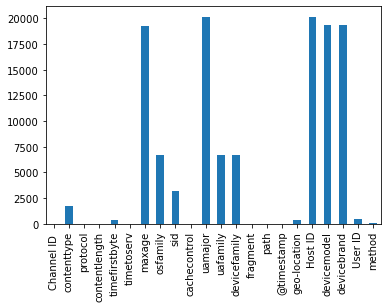

In [10]:
dataset.isnull().sum().plot.bar(x="Features", y="Missing Values")

In [11]:
dataset.nunique()

Channel ID          16
contenttype         16
protocol             2
contentlength     3425
timefirstbyte    11729
timetoserv       12902
maxage              11
osfamily            10
sid              17862
cachecontrol        15
uamajor             63
uafamily            37
devicefamily       150
fragment             1
path              9156
@timestamp       19478
geo-location      1882
Host ID            138
devicemodel        148
devicebrand         15
User ID             37
method              20
dtype: int64

In [12]:
sns.set(rc={'figure.figsize':(10,6)})

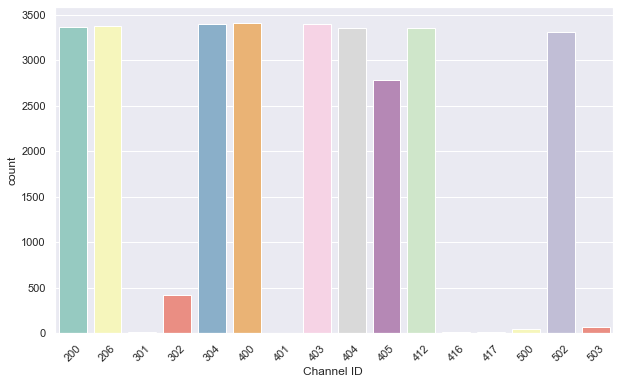

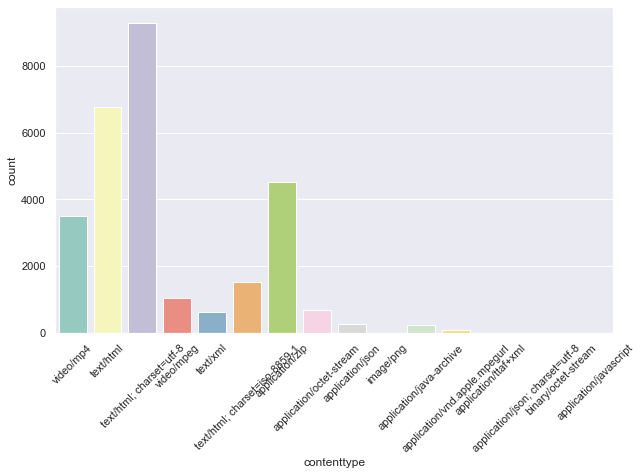

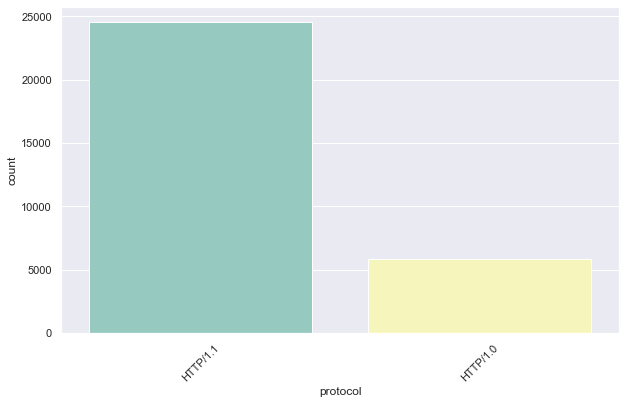

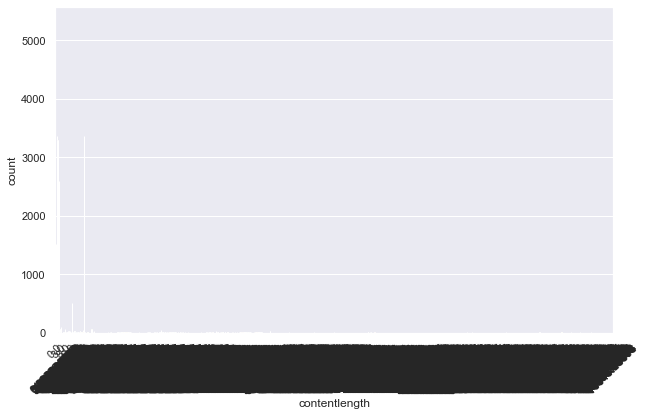

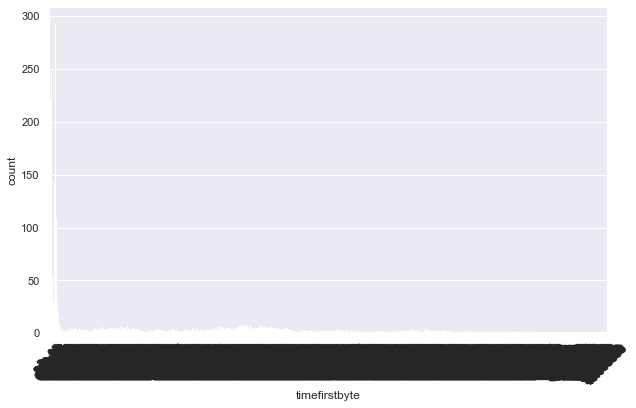

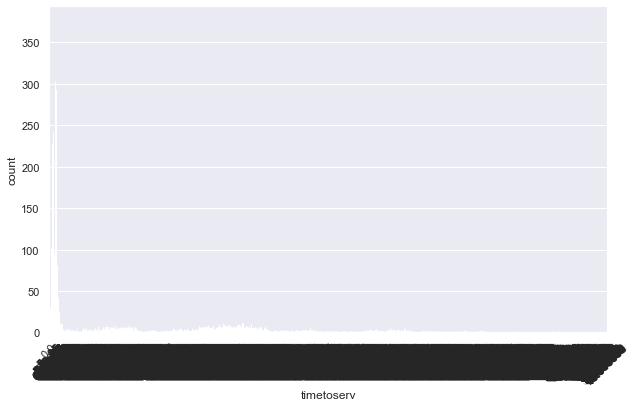

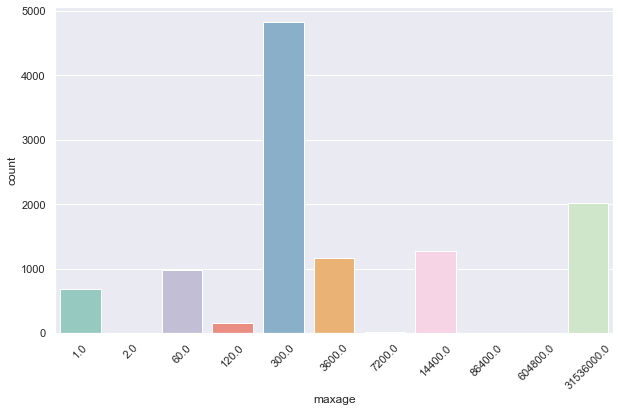

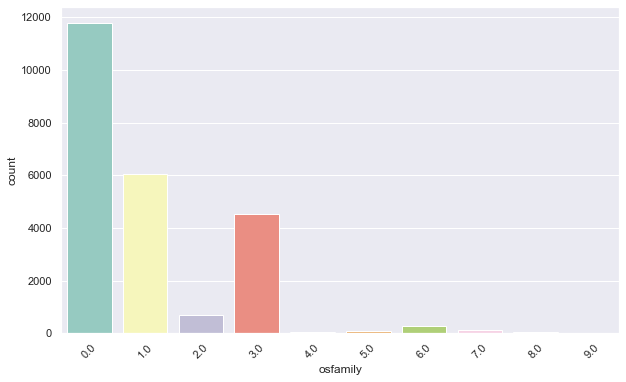

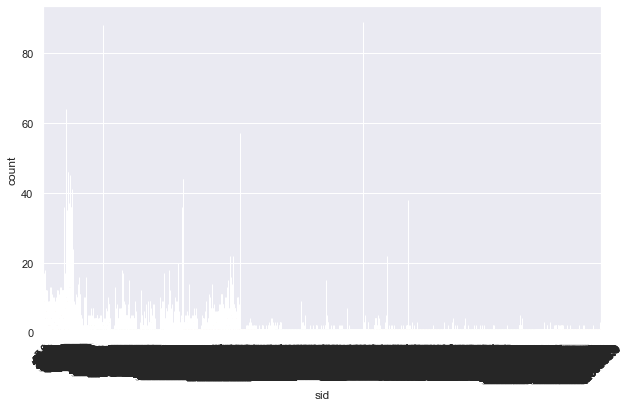

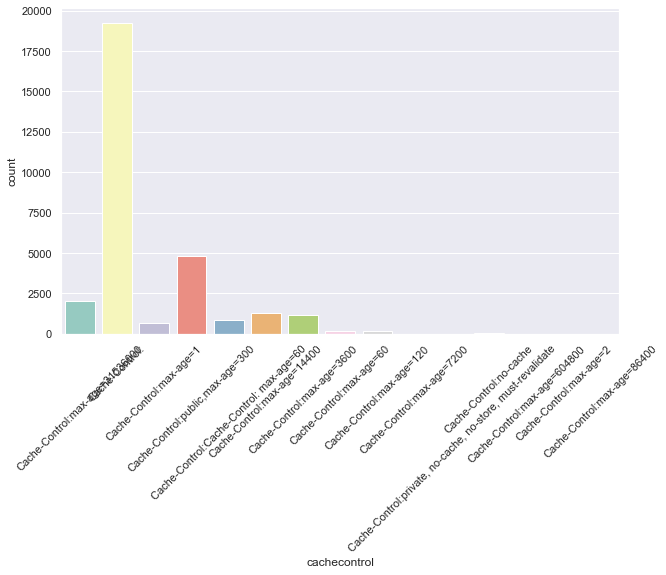

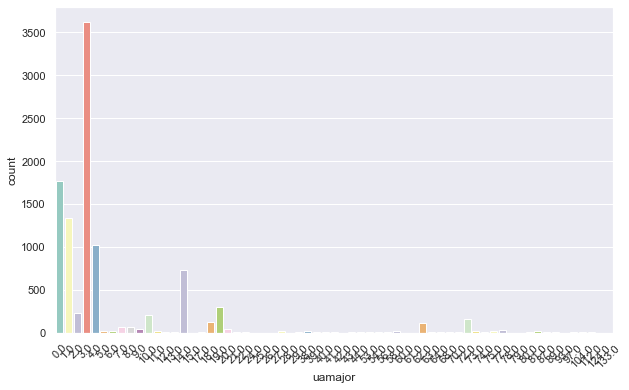

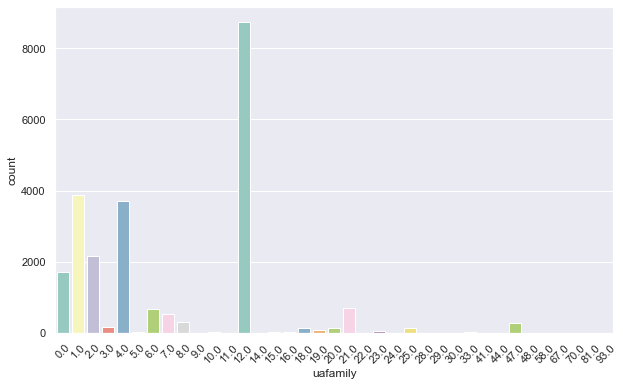

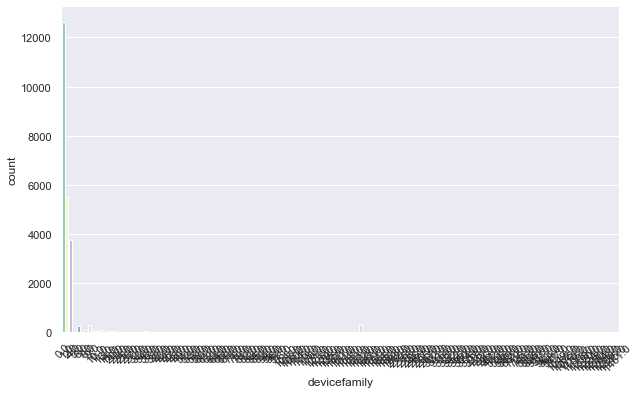

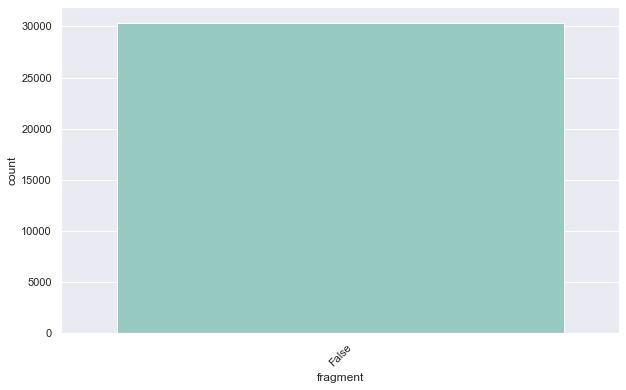

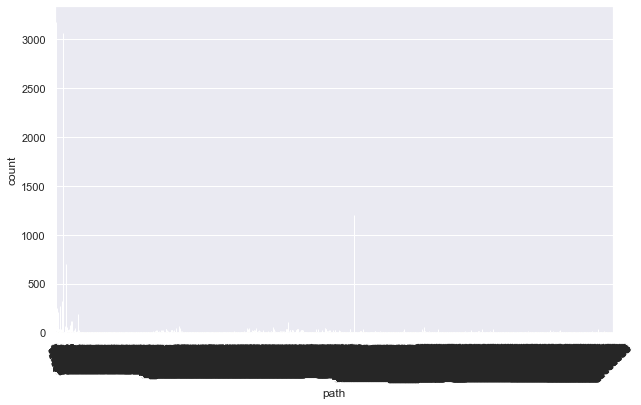

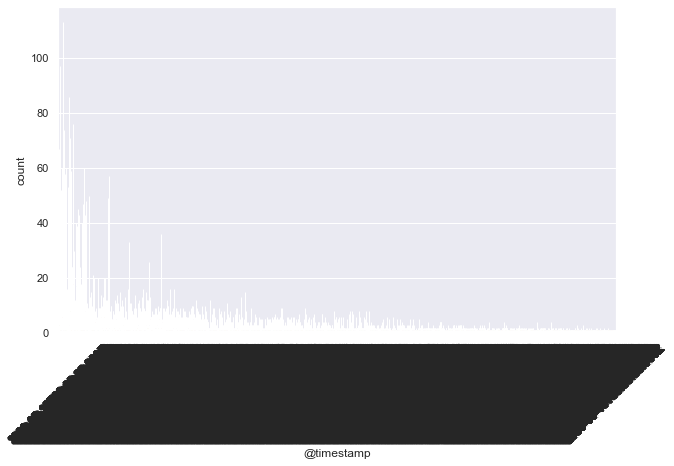

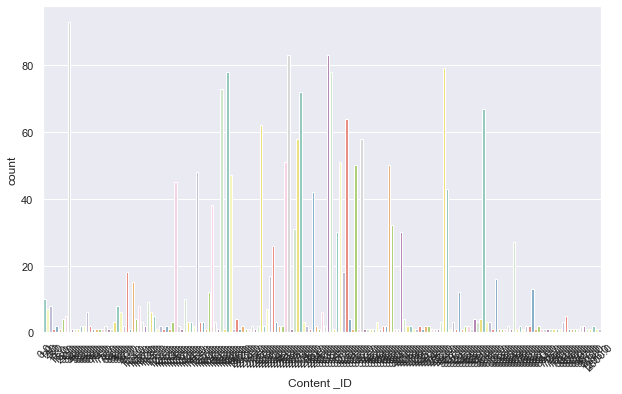

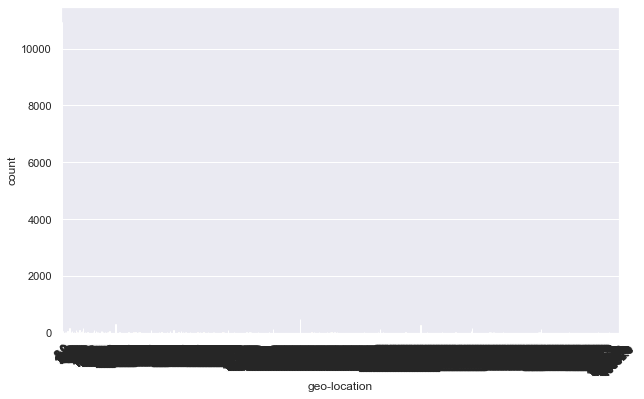

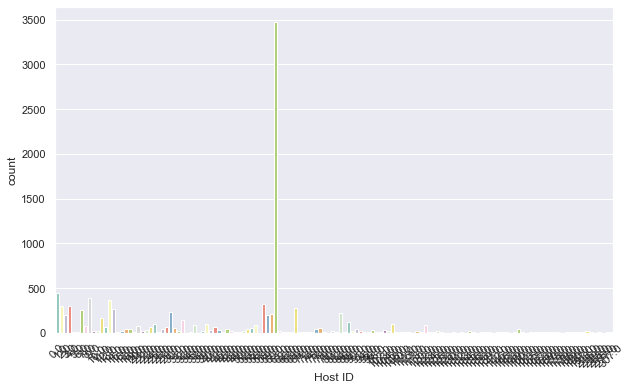

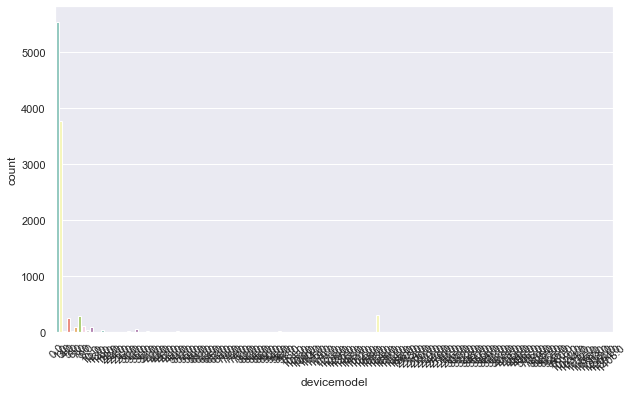

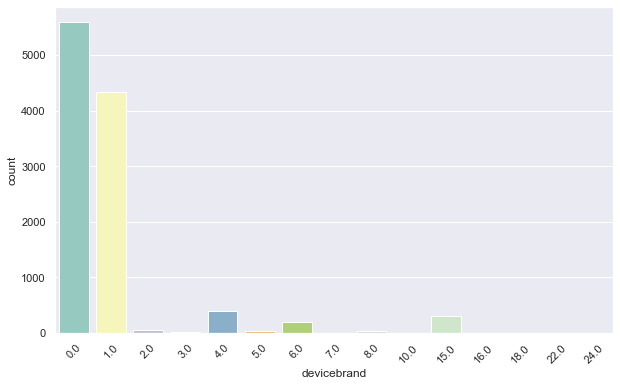

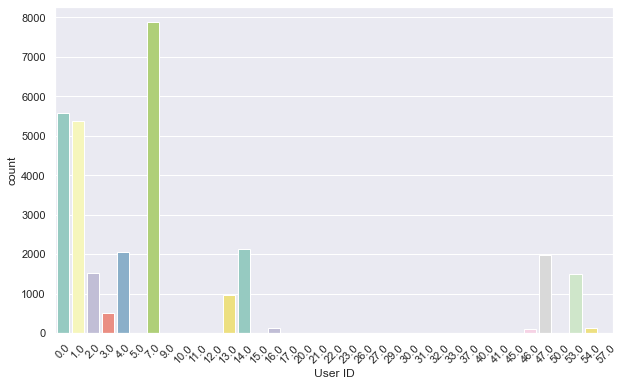

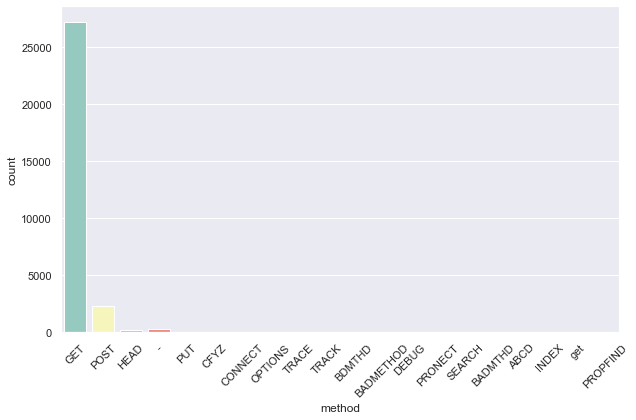

In [19]:
#Analysing the metioned features in descrption file
attributes = ['Channel ID ', 'contenttype', 'protocol', 'contentlength', 'timefirstbyte',
 'timetoserv', 'maxage', 'osfamily', 'sid', 'cachecontrol', 'uamajor',
 'uafamily', 'devicefamily', 'fragment', 'path', '@timestamp', 'Content _ID ',
 'geo-location', 'Host ID', 'devicemodel', 'devicebrand', 'User ID', 'method']
for f in attributes:
    sns.countplot(x = f, data = dataset, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.savefig('f')
    plt.show()

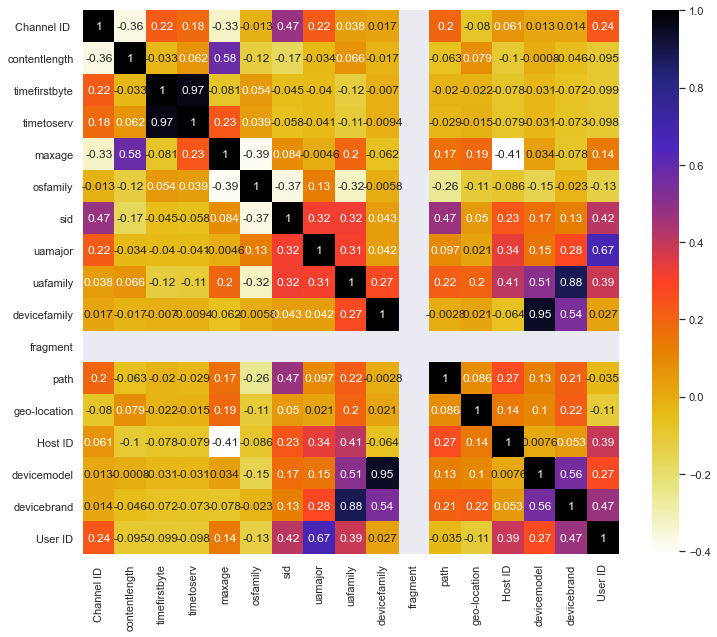

In [13]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
updated_df=dataset.drop(columns=['fragment','@timestamp'])
#'fragment' has only one value i.e; False 

In [15]:
updated_df

Channel ID                contenttype  protocol  contentlength  \
0              206                 video/mp4  HTTP/1.1   13392.936510   
1              502                 text/html  HTTP/1.1       2.634921   
2              403  text/html; charset=utf-8  HTTP/1.0       2.619048   
3              412                 text/html  HTTP/1.1      23.888889   
4              412                 text/html  HTTP/1.1      23.888889   
...            ...                       ...       ...            ...   
30360          403  text/html; charset=utf-8  HTTP/1.0       2.619048   
30361          502                 text/html  HTTP/1.1       2.634921   
30362          206                 video/mp4  HTTP/1.1   64225.714290   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   
30364          304           application/zip  HTTP/1.1       0.000000   

       timefirstbyte  timetoserv      maxage  osfamily       sid  \
0           0.000150    0.000689  31536000.0       0.0  153806.0   
1           0.020632    0.020684         NaN       1.0  165279.0   
2           0.000052    0.000120         NaN       NaN  432213.0   
3           0.014797    0.014842         NaN       NaN  207847.0   
4           0.014794    0.014847         NaN       0.0  234088.0   
...              ...         ...         ...       ...       ...   
30360       0.000056    0.000139         NaN       NaN  197138.0   
30361       8.387374    8.387429         NaN       1.0  234350.0   
30362       0.000143    2.302989  31536000.0       0.0   93673.0   
30363       0.000023    0.000081         NaN       NaN       NaN   
30364       0.000199    0.000258       300.0       3.0   26296.0   

                           cachecontrol  uamajor  uafamily  devicefamily  \
0        Cache-Control:max-age=31536000      NaN      12.0           0.0   
1                        Cache-Control:      1.0       2.0           1.0   
2                        Cache-Control:      NaN       NaN           NaN   
3                        Cache-Control:      NaN       NaN           NaN   
4                        Cache-Control:      NaN      12.0           0.0   
...                                 ...      ...       ...           ...   
30360                    Cache-Control:      NaN       NaN           NaN   
30361                    Cache-Control:      4.0       2.0           1.0   
30362    Cache-Control:max-age=31536000      NaN      12.0           0.0   
30363                    Cache-Control:      NaN       NaN           NaN   
30364  Cache-Control:public,max-age=300      3.0       4.0           2.0   

           path  geo-location  Host ID  devicemodel  devicebrand  User ID  \
0       3931298         773.0      NaN          NaN          NaN      4.0   
1            92           1.0      1.0          0.0          0.0      1.0   
2       3896814           0.0      NaN          NaN          NaN     14.0   
3      21936373           0.0     60.0          NaN          NaN      7.0   
4      25178360        1633.0     60.0          NaN          NaN      7.0   
...         ...           ...      ...          ...          ...      ...   
30360   3896667           0.0      NaN          NaN          NaN     14.0   
30361       413           1.0     48.0          0.0          0.0      1.0   
30362   3667434           6.0      NaN          NaN          NaN      4.0   
30363       935           0.0      NaN          NaN          NaN     53.0   
30364        42           0.0      NaN          1.0          1.0      0.0   

      method  
0        GET  
1        GET  
2        GET  
3        GET  
4        GET  
...      ...  
30360    GET  
30361    GET  
30362    GET  
30363   CFYZ  
30364    GET  

[30365 rows x 20 columns]

### Filling null values

In [16]:
updated_df['timefirstbyte']=updated_df['timefirstbyte'].fillna(updated_df['timefirstbyte'].mean())

In [17]:
updated_df['osfamily']=updated_df['osfamily'].fillna(updated_df['osfamily'].mean())

In [18]:
updated_df['sid']=updated_df['sid'].fillna(updated_df['sid'].mean())

In [19]:
updated_df['contenttype']=updated_df['contenttype'].fillna(updated_df['contenttype'].mode()[0])

In [20]:
updated_df['method']=updated_df['method'].fillna(updated_df['method'].mode()[0])

In [21]:
updated_df['uamajor']=updated_df['uamajor'].fillna(updated_df['uamajor'].mean())

In [22]:
updated_df['uafamily']=updated_df['uafamily'].fillna(updated_df['uafamily'].mean())

In [23]:
updated_df['devicefamily']=updated_df['devicefamily'].fillna(updated_df['devicefamily'].mean())

In [24]:
updated_df['geo-location']=updated_df['geo-location'].fillna(updated_df['geo-location'].mean())

In [25]:
updated_df['Host ID']=updated_df['Host ID'].fillna(updated_df['Host ID'].mean())

In [26]:
updated_df['geo-location']=updated_df['geo-location'].fillna(updated_df['geo-location'].mean())

In [27]:
updated_df['Host ID']=updated_df['Host ID'].fillna(updated_df['Host ID'].mean())

In [28]:
updated_df['devicemodel']=updated_df['devicemodel'].fillna(updated_df['devicemodel'].mean())

In [29]:
updated_df['devicebrand']=updated_df['devicebrand'].fillna(updated_df['devicebrand'].mean())

In [30]:
updated_df['maxage']=updated_df['maxage'].fillna(updated_df['maxage'].mean())

In [31]:
updated_df['User ID']=updated_df['User ID'].fillna(updated_df['User ID'].mean())

In [32]:
updated_df['maxage']=updated_df['maxage'].fillna(updated_df['maxage'].mean())

In [33]:
updated_df.isnull().sum(axis = 0)

Channel ID       0
contenttype      0
protocol         0
contentlength    0
timefirstbyte    0
timetoserv       0
maxage           0
osfamily         0
sid              0
cachecontrol     0
uamajor          0
uafamily         0
devicefamily     0
path             0
geo-location     0
Host ID          0
devicemodel      0
devicebrand      0
User ID          0
method           0
dtype: int64

### Histogram plot in order to select only frequent data to ease after encoding effects

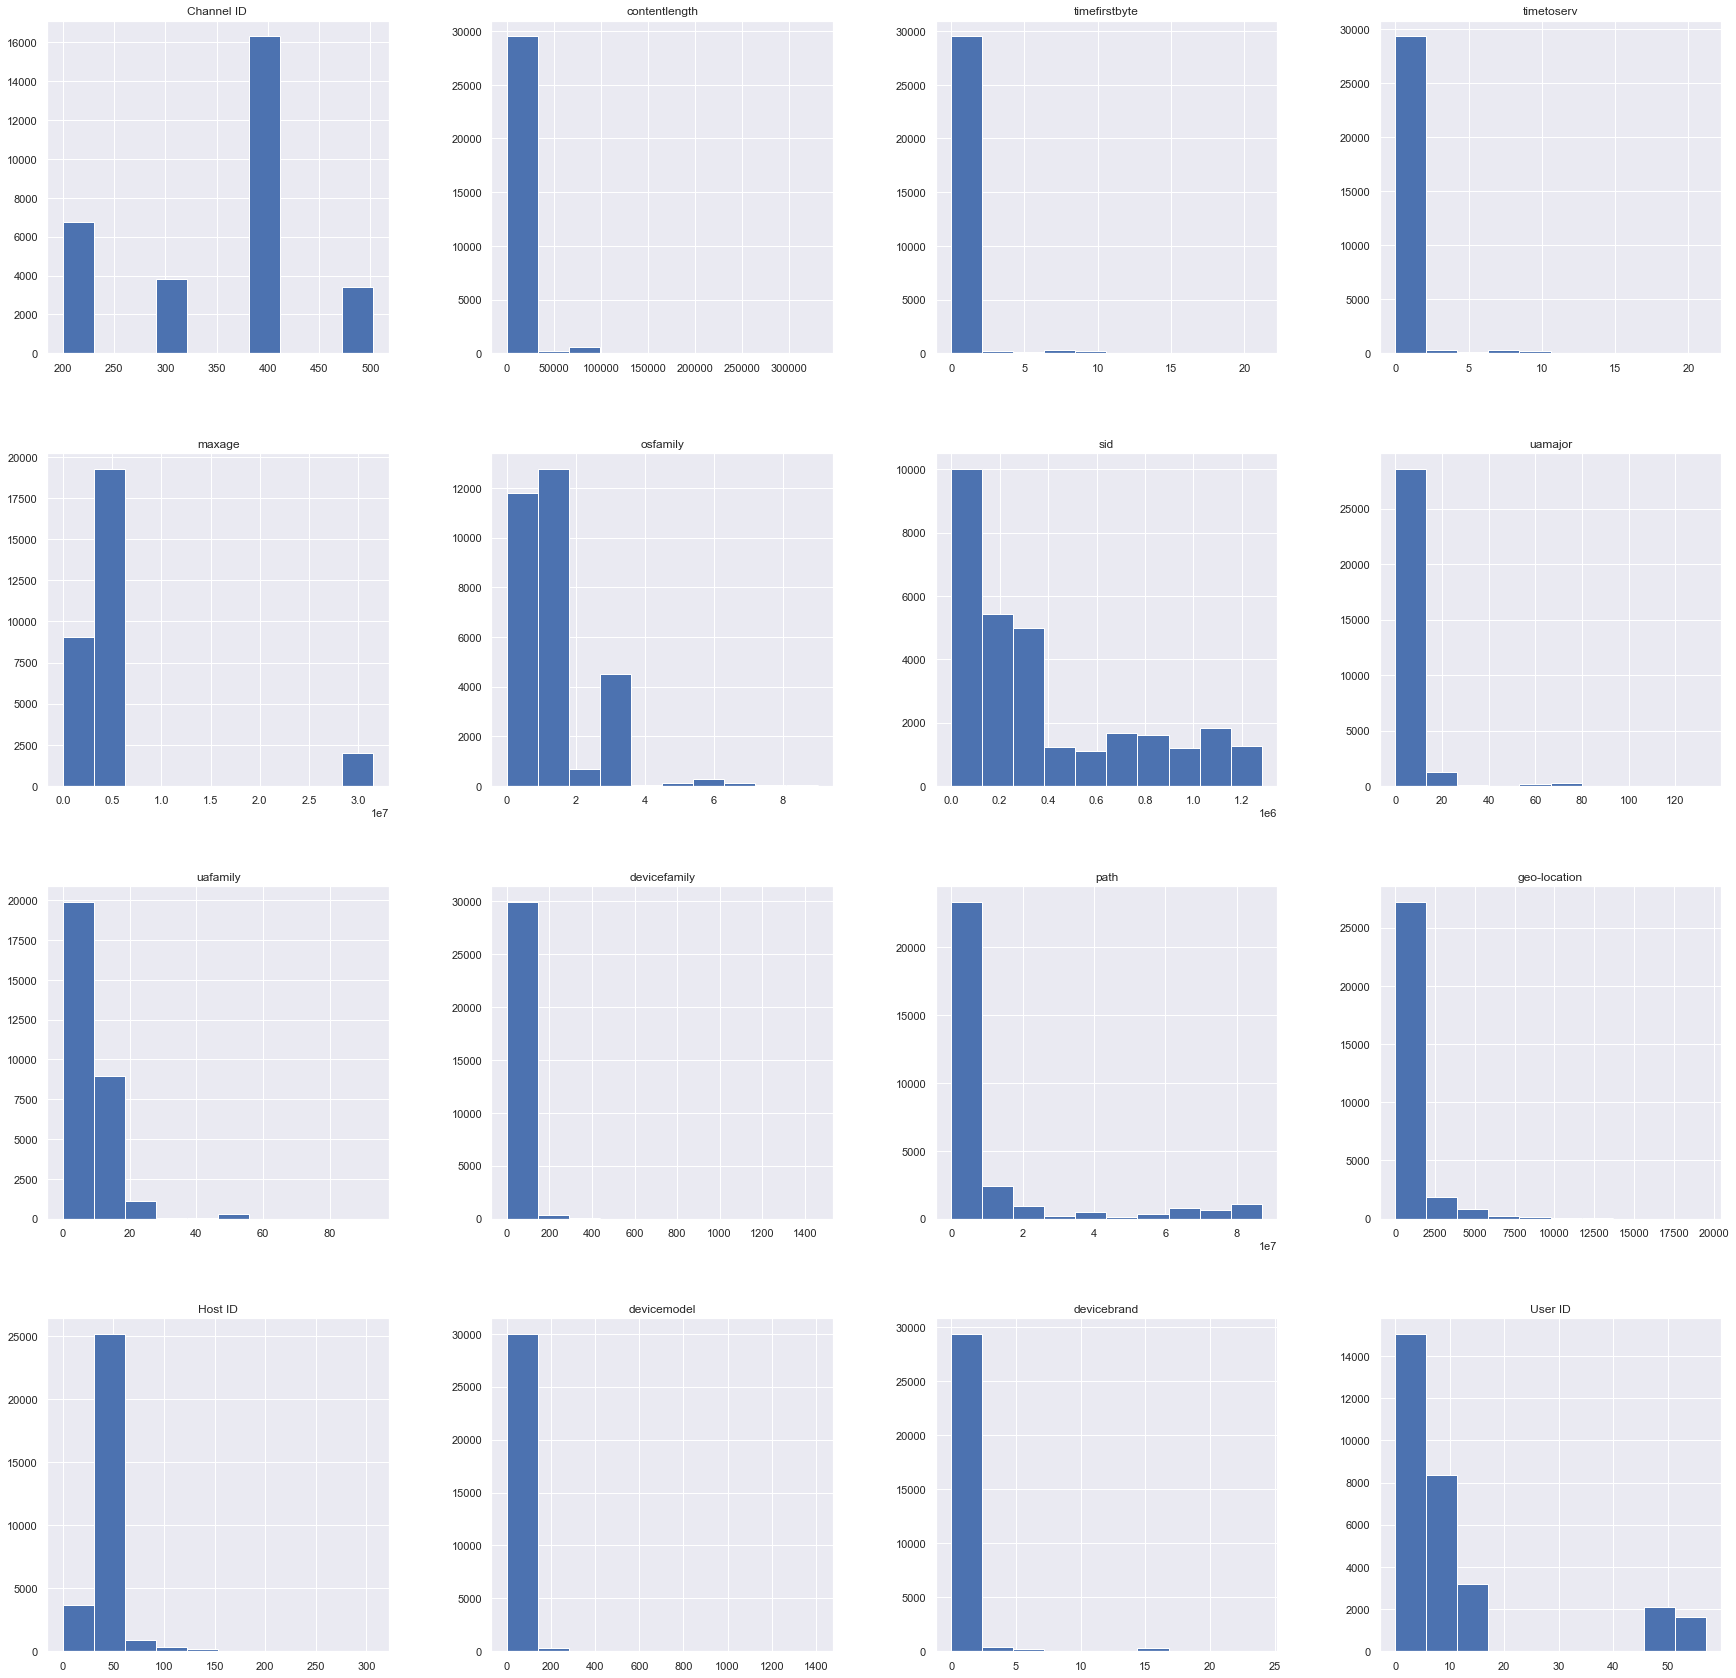

In [34]:
updated_df.hist(figsize = (30,30))
plt.show()

In [35]:
Host_id=updated_df['Host ID'].value_counts()

In [36]:
print(Host_id.to_string())

47.065333     20171
60.000000      3473
0.000000        441
8.000000        387
13.000000       364
57.000000       316
1.000000        301
3.000000        293
68.000000       273
14.000000       267
6.000000        250
28.000000       226
82.000000       224
59.000000       213
2.000000        200
58.000000       196
11.000000       163
32.000000       137
86.000000       124
24.000000        98
105.000000       97
39.000000        95
55.000000        89
35.000000        87
122.000000       84
7.000000         80
20.000000        77
12.000000        69
23.000000        64
27.000000        60
41.000000        59
30.000000        57
53.000000        49
77.000000        48
26.000000        46
52.000000        45
17.000000        45
90.000000        44
46.000000        39
149.000000       38
75.000000        37
18.000000        37
42.000000        30
103.000000       29
96.000000        29
40.000000        27
22.000000        25
134.000000       23
50.000000        23
208.000000       22


In [37]:
updated_df2 = updated_df[updated_df['Host ID'].map(updated_df['Host ID'].value_counts()).gt(20)]

In [38]:
Device_model=updated_df2['devicemodel'].value_counts()

In [39]:
print(Device_model.to_string())

11.480829      19253
0.000000        5169
1.000000        3740
163.000000       309
7.000000         258
4.000000         227
6.000000          88
8.000000          85
10.000000         78
33.000000         48
14.000000         46
9.000000          38
95.000000         31
37.000000         18
50.000000         18
3.000000          18
31.000000         16
5.000000          16
55.000000         10
58.000000         10
48.000000          9
24.000000          8
44.000000          8
77.000000          7
94.000000          7
32.000000          7
63.000000          7
310.000000         6
36.000000          6
115.000000         5
43.000000          5
312.000000         4
355.000000         4
59.000000          4
12.000000          4
72.000000          4
22.000000          4
129.000000         3
83.000000          3
214.000000         3
82.000000          3
70.000000          3
65.000000          3
42.000000          3
41.000000          3
25.000000          3
110.000000         2
322.000000   

In [40]:
updated_df2 = updated_df2[updated_df2['devicemodel'].map(updated_df2['devicemodel'].value_counts()).gt(4)]

In [41]:
Device_model=updated_df2['devicemodel'].value_counts()

In [42]:
print(Device_model.to_string())

11.480829     19253
0.000000       5169
1.000000       3740
163.000000      309
7.000000        258
4.000000        227
6.000000         88
8.000000         85
10.000000        78
33.000000        48
14.000000        46
9.000000         38
95.000000        31
50.000000        18
37.000000        18
3.000000         18
5.000000         16
31.000000        16
58.000000        10
55.000000        10
48.000000         9
24.000000         8
44.000000         8
77.000000         7
63.000000         7
32.000000         7
94.000000         7
36.000000         6
310.000000        6
115.000000        5
43.000000         5


In [43]:
updated_df2 = updated_df2[updated_df2['devicemodel'].map(updated_df2['devicemodel'].value_counts()).gt(10)]

In [44]:
updated_df2

Channel ID                contenttype  protocol  contentlength  \
0              206                 video/mp4  HTTP/1.1   13392.936510   
1              502                 text/html  HTTP/1.1       2.634921   
2              403  text/html; charset=utf-8  HTTP/1.0       2.619048   
3              412                 text/html  HTTP/1.1      23.888889   
4              412                 text/html  HTTP/1.1      23.888889   
...            ...                       ...       ...            ...   
30359          403  text/html; charset=utf-8  HTTP/1.0       2.619048   
30360          403  text/html; charset=utf-8  HTTP/1.0       2.619048   
30362          206                 video/mp4  HTTP/1.1   64225.714290   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   
30364          304           application/zip  HTTP/1.1       0.000000   

       timefirstbyte  timetoserv        maxage  osfamily            sid  \
0           0.000150    0.000689  3.153600e+07  0.000000  153806.000000   
1           0.020632    0.020684  5.735584e+06  1.000000  165279.000000   
2           0.000052    0.000120  5.735584e+06  1.041704  432213.000000   
3           0.014797    0.014842  5.735584e+06  1.041704  207847.000000   
4           0.014794    0.014847  5.735584e+06  0.000000  234088.000000   
...              ...         ...           ...       ...            ...   
30359       0.000065    0.000156  5.735584e+06  1.041704   34458.000000   
30360       0.000056    0.000139  5.735584e+06  1.041704  197138.000000   
30362       0.000143    2.302989  3.153600e+07  0.000000   93673.000000   
30363       0.000023    0.000081  5.735584e+06  1.041704  377176.750257   
30364       0.000199    0.000258  3.000000e+02  3.000000   26296.000000   

                           cachecontrol   uamajor   uafamily  devicefamily  \
0        Cache-Control:max-age=31536000  7.607646  12.000000       0.00000   
1                        Cache-Control:  1.000000   2.000000       1.00000   
2                        Cache-Control:  7.607646   7.716068       6.14186   
3                        Cache-Control:  7.607646   7.716068       6.14186   
4                        Cache-Control:  7.607646  12.000000       0.00000   
...                                 ...       ...        ...           ...   
30359                    Cache-Control:  7.607646   7.716068       6.14186   
30360                    Cache-Control:  7.607646   7.716068       6.14186   
30362    Cache-Control:max-age=31536000  7.607646  12.000000       0.00000   
30363                    Cache-Control:  7.607646   7.716068       6.14186   
30364  Cache-Control:public,max-age=300  3.000000   4.000000       2.00000   

           path  geo-location    Host ID  devicemodel  devicebrand  User ID  \
0       3931298         773.0  47.065333    11.480829     1.153462      4.0   
1            92           1.0   1.000000     0.000000     0.000000      1.0   
2       3896814           0.0  47.065333    11.480829     1.153462     14.0   
3      21936373           0.0  60.000000    11.480829     1.153462      7.0   
4      25178360        1633.0  60.000000    11.480829     1.153462      7.0   
...         ...           ...        ...          ...          ...      ...   
30359   3922838           0.0  47.065333    11.480829     1.153462     14.0   
30360   3896667           0.0  47.065333    11.480829     1.153462     14.0   
30362   3667434           6.0  47.065333    11.480829     1.153462      4.0   
30363       935           0.0  47.065333    11.480829     1.153462     53.0   
30364        42           0.0  47.065333     1.000000     1.000000      0.0   

      method  
0        GET  
1        GET  
2        GET  
3        GET  
4        GET  
...      ...  
30359    GET  
30360    GET  
30362    GET  
30363   CFYZ  
30364    GET  

[29456 rows x 20 columns]

In [45]:
updated_df2.nunique()

Channel ID          16
contenttype         16
protocol             2
contentlength     3312
timefirstbyte    11145
timetoserv       12297
maxage              12
osfamily            11
sid              17475
cachecontrol        15
uamajor             62
uafamily            36
devicefamily        19
path              8867
geo-location      1854
Host ID             53
devicemodel         18
devicebrand          9
User ID             38
method              20
dtype: int64

In [46]:
Geo=updated_df2['geo-location'].value_counts()

In [47]:
print(Geo.to_string())

0.000000        10840
1.000000         7478
1462.000000       493
599.943727        404
252.000000        317
2545.000000       287
95.000000         177
34.000000         168
3387.000000       158
5344.000000       152
2093.000000       152
1252.000000       123
444.000000        104
2.000000          100
945.000000        100
63.000000         100
588.000000         93
80.000000          87
152.000000         85
8.000000           76
27.000000          66
188.000000         65
88.000000          64
3373.000000        63
163.000000         61
6.000000           60
23.000000          56
190.000000         55
630.000000         54
572.000000         53
225.000000         52
3100.000000        52
9307.000000        52
116.000000         50
48.000000          50
277.000000         49
944.000000         47
92.000000          45
828.000000         45
367.000000         42
2076.000000        42
3948.000000        42
1693.000000        42
984.000000         41
160.000000         41
147.000000

In [48]:
updated_df3 = updated_df2[updated_df2['geo-location'].map(updated_df2['geo-location'].value_counts()).gt(10)]

In [49]:
Con_l=updated_df3['contentlength'].value_counts()

In [50]:
print(Con_l.to_string())

0.000000        3956
2.619048        3347
23.888889       3132
2.634921        2604
3.047619        2570
2.714286        1789
0.285714        1506
0.206349         941
15.079365        404
0.238095         161
17.317460        132
4.539683          64
7.555556          64
68.253968         47
2.952381          44
8.126984          42
22.587302         42
531.174603        37
8.158730          35
20.809524         31
22.571429         30
20.825397         27
2.904762          27
2700.269841       23
2685.920635       23
15.174603         23
22.269841         22
0.523810          22
20.793651         21
9.000000          21
12.507937         21
20.873016         20
22.285714         20
22.603175         20
22.301587         19
22.555556         18
9.015873          18
71.253968         18
20.841270         17
21.460317         16
1579.238095       15
158.031746        15
20.857143         15
22.253968         15
22.539683         14
22.619048         13
1579.269841       13
1579.126984  

In [51]:
updated_df3 = updated_df3[updated_df3['contentlength'].map(updated_df3['contentlength'].value_counts()).gt(10)]

In [52]:
updated_df3

Channel ID                     contenttype  protocol  contentlength  \
1              502                      text/html  HTTP/1.1       2.634921   
2              403       text/html; charset=utf-8  HTTP/1.0       2.619048   
3              412                      text/html  HTTP/1.1      23.888889   
7              200                       text/xml  HTTP/1.1      22.587302   
8              404  text/html; charset=iso-8859-1  HTTP/1.1       0.285714   
...            ...                            ...       ...            ...   
30358          412                      text/html  HTTP/1.1      23.888889   
30359          403       text/html; charset=utf-8  HTTP/1.0       2.619048   
30360          403       text/html; charset=utf-8  HTTP/1.0       2.619048   
30363          405       text/html; charset=utf-8  HTTP/1.1       3.047619   
30364          304                application/zip  HTTP/1.1       0.000000   

       timefirstbyte  timetoserv        maxage  osfamily            sid  \
1           0.020632    0.020684  5.735584e+06  1.000000  165279.000000   
2           0.000052    0.000120  5.735584e+06  1.041704  432213.000000   
3           0.014797    0.014842  5.735584e+06  1.041704  207847.000000   
7           0.000145    0.000201  1.000000e+00  1.000000     246.000000   
8           0.037316    0.037376  5.735584e+06  1.000000  487092.000000   
...              ...         ...           ...       ...            ...   
30358       0.013421    0.013473  5.735584e+06  0.000000  958563.000000   
30359       0.000065    0.000156  5.735584e+06  1.041704   34458.000000   
30360       0.000056    0.000139  5.735584e+06  1.041704  197138.000000   
30363       0.000023    0.000081  5.735584e+06  1.041704  377176.750257   
30364       0.000199    0.000258  3.000000e+02  3.000000   26296.000000   

                           cachecontrol   uamajor   uafamily  devicefamily  \
1                        Cache-Control:  1.000000   2.000000       1.00000   
2                        Cache-Control:  7.607646   7.716068       6.14186   
3                        Cache-Control:  7.607646   7.716068       6.14186   
7               Cache-Control:max-age=1  1.000000   2.000000       1.00000   
8                        Cache-Control:  7.607646   1.000000       1.00000   
...                                 ...       ...        ...           ...   
30358                    Cache-Control:  7.607646  12.000000       0.00000   
30359                    Cache-Control:  7.607646   7.716068       6.14186   
30360                    Cache-Control:  7.607646   7.716068       6.14186   
30363                    Cache-Control:  7.607646   7.716068       6.14186   
30364  Cache-Control:public,max-age=300  3.000000   4.000000       2.00000   

           path  geo-location    Host ID  devicemodel  devicebrand  User ID  \
1            92           1.0   1.000000     0.000000     0.000000      1.0   
2       3896814           0.0  47.065333    11.480829     1.153462     14.0   
3      21936373           0.0  60.000000    11.480829     1.153462      7.0   
7            18           1.0   8.000000     0.000000     0.000000      1.0   
8           307           1.0  47.065333     0.000000     0.000000      2.0   
...         ...           ...        ...          ...          ...      ...   
30358  75529665           0.0  60.000000    11.480829     1.153462      7.0   
30359   3922838           0.0  47.065333    11.480829     1.153462     14.0   
30360   3896667           0.0  47.065333    11.480829     1.153462     14.0   
30363       935           0.0  47.065333    11.480829     1.153462     53.0   
30364        42           0.0  47.065333     1.000000     1.000000      0.0   

      method  
1        GET  
2        GET  
3        GET  
7        GET  
8        GET  
...      ...  
30358    GET  
30359    GET  
30360    GET  
30363   CFYZ  
30364    GET  

[21613 rows x 20 columns]

In [53]:
updated_df3.nunique()

Channel ID          14
contenttype         12
protocol             2
contentlength       59
timefirstbyte     8652
timetoserv        8548
maxage               8
osfamily            11
sid              13537
cachecontrol         9
uamajor             55
uafamily            31
devicefamily        18
path              5897
geo-location       176
Host ID             52
devicemodel         17
devicebrand          9
User ID             30
method              20
dtype: int64

In [54]:
path=updated_df3['path'].value_counts()

In [55]:
print(path.to_string())

42          2397
2457        1800
11016334    1202
67891        699
1            404
935          291
307          272
82           221
31           214
18           208
151          188
0            157
562204       132
92           125
19           116
12           116
334          113
123          108
3899059      108
136           92
165604        72
98            69
283205        64
205609        64
63            64
3892436       63
3898029       55
134           55
149           52
227539        50
83215         50
3892477       49
16            47
3896344       47
35546         47
3896423       46
24842968      46
3896823       46
55            43
91            43
293292        42
20053555      41
60714813      40
9569          40
3901368       39
83593216      39
3896394       38
3892280       38
4119          38
38757437      38
3902503       38
86511         38
3898895       37
281485        36
17            35
3903575       35
57904         35
58842         34
30            

In [56]:
updated_df3 = updated_df3[updated_df3['path'].map(updated_df3['path'].value_counts()).gt(4)]

In [57]:
updated_df3

Channel ID                     contenttype  protocol  contentlength  \
1              502                      text/html  HTTP/1.1       2.634921   
2              403       text/html; charset=utf-8  HTTP/1.0       2.619048   
7              200                       text/xml  HTTP/1.1      22.587302   
8              404  text/html; charset=iso-8859-1  HTTP/1.1       0.285714   
10             200                application/zip  HTTP/1.1      17.317460   
...            ...                            ...       ...            ...   
30353          400       text/html; charset=utf-8  HTTP/1.1       2.714286   
30356          502                      text/html  HTTP/1.1       2.634921   
30360          403       text/html; charset=utf-8  HTTP/1.0       2.619048   
30363          405       text/html; charset=utf-8  HTTP/1.1       3.047619   
30364          304                application/zip  HTTP/1.1       0.000000   

       timefirstbyte  timetoserv        maxage  osfamily            sid  \
1           0.020632    0.020684  5.735584e+06  1.000000  165279.000000   
2           0.000052    0.000120  5.735584e+06  1.041704  432213.000000   
7           0.000145    0.000201  1.000000e+00  1.000000     246.000000   
8           0.037316    0.037376  5.735584e+06  1.000000  487092.000000   
10          0.000121    0.000184  3.000000e+02  0.000000    4116.000000   
...              ...         ...           ...       ...            ...   
30353       0.015968    0.016005  5.735584e+06  0.000000  753625.000000   
30356       9.923064    9.923115  5.735584e+06  1.000000   16575.000000   
30360       0.000056    0.000139  5.735584e+06  1.041704  197138.000000   
30363       0.000023    0.000081  5.735584e+06  1.041704  377176.750257   
30364       0.000199    0.000258  3.000000e+02  3.000000   26296.000000   

                           cachecontrol   uamajor   uafamily  devicefamily  \
1                        Cache-Control:  1.000000   2.000000       1.00000   
2                        Cache-Control:  7.607646   7.716068       6.14186   
7               Cache-Control:max-age=1  1.000000   2.000000       1.00000   
8                        Cache-Control:  7.607646   1.000000       1.00000   
10     Cache-Control:public,max-age=300  0.000000   0.000000       0.00000   
...                                 ...       ...        ...           ...   
30353                    Cache-Control:  7.607646  12.000000       0.00000   
30356                    Cache-Control:  1.000000   2.000000       1.00000   
30360                    Cache-Control:  7.607646   7.716068       6.14186   
30363                    Cache-Control:  7.607646   7.716068       6.14186   
30364  Cache-Control:public,max-age=300  3.000000   4.000000       2.00000   

          path  geo-location    Host ID  devicemodel  devicebrand  User ID  \
1           92           1.0   1.000000     0.000000     0.000000      1.0   
2      3896814           0.0  47.065333    11.480829     1.153462     14.0   
7           18           1.0   8.000000     0.000000     0.000000      1.0   
8          307           1.0  47.065333     0.000000     0.000000      2.0   
10      562204           0.0  47.065333    11.480829     1.153462      0.0   
...        ...           ...        ...          ...          ...      ...   
30353     2457           0.0  47.065333    11.480829     1.153462      7.0   
30356       98         163.0  32.000000     0.000000     0.000000      1.0   
30360  3896667           0.0  47.065333    11.480829     1.153462     14.0   
30363      935           0.0  47.065333    11.480829     1.153462     53.0   
30364       42           0.0  47.065333     1.000000     1.000000      0.0   

      method  
1        GET  
2        GET  
7        GET  
8        GET  
10       GET  
...      ...  
30353    GET  
30356    GET  
30360    GET  
30363   CFYZ  
30364    GET  

[14978 rows x 20 columns]

In [58]:
updated_df3.nunique()

Channel ID         12
contenttype         9
protocol            2
contentlength      57
timefirstbyte    6025
timetoserv       5971
maxage              7
osfamily           11
sid              7454
cachecontrol        7
uamajor            49
uafamily           30
devicefamily       17
path              401
geo-location      169
Host ID            45
devicemodel        16
devicebrand         9
User ID            24
method             20
dtype: int64

In [59]:
sid=updated_df3['sid'].value_counts()

In [60]:
print(sid.to_string())

3.771768e+05    3082
3.549000e+03      53
3.740000e+03      35
3.830000e+03      35
3.604000e+03      32
4.092000e+03      30
3.918000e+03      30
3.760000e+03      28
3.995000e+03      27
3.323000e+03      26
3.848000e+03      26
4.038000e+03      25
3.867000e+03      25
4.088000e+03      24
3.757000e+03      23
3.945000e+03      23
2.288140e+05      22
3.946000e+03      22
3.931000e+03      22
3.719000e+03      22
2.303310e+05      22
3.843000e+03      21
4.167000e+03      19
3.739000e+03      18
2.303320e+05      18
3.930000e+03      18
4.116000e+03      17
3.869000e+03      17
3.954000e+03      17
3.903000e+03      17
3.815000e+03      16
3.961000e+03      16
3.929000e+03      16
6.328900e+04      15
4.125000e+03      15
4.621090e+05      15
1.370200e+05      15
2.273860e+05      15
4.965000e+03      15
2.134220e+05      14
4.872000e+03      14
3.907000e+03      14
4.129000e+03      14
3.873000e+03      14
3.499000e+03      13
4.049000e+03      13
1.273600e+04      13
4.037000e+03 

In [61]:
updated_df3 = updated_df3[updated_df3['sid'].map(updated_df3['sid'].value_counts()).gt(3)]

In [62]:
updated_df3

Channel ID                contenttype  protocol  contentlength  \
1              502                 text/html  HTTP/1.1       2.634921   
7              200                  text/xml  HTTP/1.1      22.587302   
10             200           application/zip  HTTP/1.1      17.317460   
12             405  text/html; charset=utf-8  HTTP/1.1       3.047619   
21             405  text/html; charset=utf-8  HTTP/1.0       3.047619   
...            ...                       ...       ...            ...   
30341          200           application/zip  HTTP/1.1       8.158730   
30342          405  text/html; charset=utf-8  HTTP/1.0       3.047619   
30349          400  text/html; charset=utf-8  HTTP/1.0       0.000000   
30356          502                 text/html  HTTP/1.1       2.634921   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   

       timefirstbyte  timetoserv        maxage  osfamily            sid  \
1           0.020632    0.020684  5.735584e+06  1.000000  165279.000000   
7           0.000145    0.000201  1.000000e+00  1.000000     246.000000   
10          0.000121    0.000184  3.000000e+02  0.000000    4116.000000   
12          0.000036    0.000124  5.735584e+06  2.000000  377176.750257   
21          0.000044    0.000123  5.735584e+06  1.041704  377176.750257   
...              ...         ...           ...       ...            ...   
30341       0.000142    0.000221  3.000000e+02  0.000000    3622.000000   
30342       0.000041    0.000136  5.735584e+06  2.000000  377176.750257   
30349       0.252041    0.000000  5.735584e+06  1.041704  377176.750257   
30356       9.923064    9.923115  5.735584e+06  1.000000   16575.000000   
30363       0.000023    0.000081  5.735584e+06  1.041704  377176.750257   

                           cachecontrol    uamajor  uafamily  devicefamily  \
1                        Cache-Control:   1.000000  2.000000       1.00000   
7               Cache-Control:max-age=1   1.000000  2.000000       1.00000   
10     Cache-Control:public,max-age=300   0.000000  0.000000       0.00000   
12                       Cache-Control:   7.607646  1.000000       0.00000   
21                       Cache-Control:   7.607646  7.716068       6.14186   
...                                 ...        ...       ...           ...   
30341  Cache-Control:public,max-age=300   0.000000  0.000000       0.00000   
30342                    Cache-Control:  75.000000  7.000000       0.00000   
30349                    Cache-Control:   7.607646  7.716068       6.14186   
30356                    Cache-Control:   1.000000  2.000000       1.00000   
30363                    Cache-Control:   7.607646  7.716068       6.14186   

           path  geo-location    Host ID  devicemodel  devicebrand    User ID  \
1            92      1.000000   1.000000     0.000000     0.000000   1.000000   
7            18      1.000000   8.000000     0.000000     0.000000   1.000000   
10       562204      0.000000  47.065333    11.480829     1.153462   0.000000   
12      3910567      0.000000  47.065333    11.480829     1.153462  53.000000   
21      3901217      0.000000  47.065333    11.480829     1.153462  47.000000   
...         ...           ...        ...          ...          ...        ...   
30341        17      0.000000  47.065333    11.480829     1.153462   0.000000   
30342   3898899      0.000000  47.065333    11.480829     1.153462  53.000000   
30349  60714813    599.943727  47.065333    11.480829     1.153462  10.155135   
30356        98    163.000000  32.000000     0.000000     0.000000   1.000000   
30363       935      0.000000  47.065333    11.480829     1.153462  53.000000   

      method  
1        GET  
7        GET  
10       GET  
12      POST  
21      POST  
...      ...  
30341    GET  
30342   POST  
30349      -  
30356    GET  
30363   CFYZ  

[6852 rows x 20 columns]

In [63]:
Time_b=updated_df3['timefirstbyte'].value_counts()
print(Time_b.to_string())

0.252041     375
0.000038     194
0.000036     180
0.000037     170
0.000039     160
0.000040     157
0.000041     148
0.000035     137
0.000139     112
0.000034     107
0.000042     101
0.000134      98
0.000140      94
0.000043      93
0.000137      92
0.000033      92
0.000135      88
0.000136      87
0.000032      83
0.000031      82
0.000144      81
0.000138      77
0.000046      74
0.000141      74
0.000133      74
0.000142      71
0.000132      67
0.000143      64
0.000045      60
0.000044      56
0.000131      53
0.000145      52
0.000130      48
0.000149      45
0.000047      43
0.000146      42
0.000129      41
0.000030      41
0.000028      40
0.000049      39
0.000048      38
0.000029      37
0.000147      36
0.000026      34
0.000154      31
0.000051      31
0.000148      31
0.000024      29
0.000128      29
0.000053      28
0.000025      28
0.000153      27
0.000050      27
0.000052      26
0.000054      25
0.000056      22
0.000127      22
0.000023      21
0.000055      

In [64]:
updated_df3 = updated_df3[updated_df3['timefirstbyte'].map(updated_df3['timefirstbyte'].value_counts()).gt(2)]

In [65]:
updated_df3

Channel ID                contenttype  protocol  contentlength  \
7              200                  text/xml  HTTP/1.1      22.587302   
10             200           application/zip  HTTP/1.1      17.317460   
12             405  text/html; charset=utf-8  HTTP/1.1       3.047619   
21             405  text/html; charset=utf-8  HTTP/1.0       3.047619   
23             405  text/html; charset=utf-8  HTTP/1.0       3.047619   
...            ...                       ...       ...            ...   
30332          405  text/html; charset=utf-8  HTTP/1.0       3.047619   
30341          200           application/zip  HTTP/1.1       8.158730   
30342          405  text/html; charset=utf-8  HTTP/1.0       3.047619   
30349          400  text/html; charset=utf-8  HTTP/1.0       0.000000   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   

       timefirstbyte  timetoserv        maxage  osfamily            sid  \
7           0.000145    0.000201  1.000000e+00  1.000000     246.000000   
10          0.000121    0.000184  3.000000e+02  0.000000    4116.000000   
12          0.000036    0.000124  5.735584e+06  2.000000  377176.750257   
21          0.000044    0.000123  5.735584e+06  1.041704  377176.750257   
23          0.000044    0.000136  5.735584e+06  1.041704  377176.750257   
...              ...         ...           ...       ...            ...   
30332       0.000041    0.000156  5.735584e+06  1.041704  377176.750257   
30341       0.000142    0.000221  3.000000e+02  0.000000    3622.000000   
30342       0.000041    0.000136  5.735584e+06  2.000000  377176.750257   
30349       0.252041    0.000000  5.735584e+06  1.041704  377176.750257   
30363       0.000023    0.000081  5.735584e+06  1.041704  377176.750257   

                           cachecontrol    uamajor  uafamily  devicefamily  \
7               Cache-Control:max-age=1   1.000000  2.000000       1.00000   
10     Cache-Control:public,max-age=300   0.000000  0.000000       0.00000   
12                       Cache-Control:   7.607646  1.000000       0.00000   
21                       Cache-Control:   7.607646  7.716068       6.14186   
23                       Cache-Control:   7.607646  7.716068       6.14186   
...                                 ...        ...       ...           ...   
30332                    Cache-Control:   7.607646  7.716068       6.14186   
30341  Cache-Control:public,max-age=300   0.000000  0.000000       0.00000   
30342                    Cache-Control:  75.000000  7.000000       0.00000   
30349                    Cache-Control:   7.607646  7.716068       6.14186   
30363                    Cache-Control:   7.607646  7.716068       6.14186   

           path  geo-location    Host ID  devicemodel  devicebrand    User ID  \
7            18      1.000000   8.000000     0.000000     0.000000   1.000000   
10       562204      0.000000  47.065333    11.480829     1.153462   0.000000   
12      3910567      0.000000  47.065333    11.480829     1.153462  53.000000   
21      3901217      0.000000  47.065333    11.480829     1.153462  47.000000   
23      3896423      0.000000  47.065333    11.480829     1.153462  53.000000   
...         ...           ...        ...          ...          ...        ...   
30332   3910667      0.000000  47.065333    11.480829     1.153462  14.000000   
30341        17      0.000000  47.065333    11.480829     1.153462   0.000000   
30342   3898899      0.000000  47.065333    11.480829     1.153462  53.000000   
30349  60714813    599.943727  47.065333    11.480829     1.153462  10.155135   
30363       935      0.000000  47.065333    11.480829     1.153462  53.000000   

      method  
7        GET  
10       GET  
12      POST  
21      POST  
23      POST  
...      ...  
30332   POST  
30341    GET  
30342   POST  
30349      -  
30363   CFYZ  

[5337 rows x 20 columns]

In [66]:
Time_s=updated_df3['timetoserv'].value_counts()
print(Time_s.to_string())

0.000000     375
0.000200     132
0.000205     127
0.000123     114
0.000211     109
0.000118      98
0.000133      95
0.000128      84
0.000113      84
0.000195      76
0.000216      74
0.000138      73
0.000108      69
0.000202      57
0.000209      56
0.000190      54
0.000206      54
0.000210      52
0.000199      52
0.000122      51
0.000120      51
0.000127      51
0.000207      50
0.000204      50
0.000119      50
0.000203      48
0.000196      47
0.000121      46
0.000125      44
0.000201      43
0.000164      42
0.000114      42
0.000124      41
0.000144      41
0.000111      41
0.000215      41
0.000221      39
0.000116      39
0.000132      39
0.000117      39
0.000102      39
0.000208      38
0.000197      38
0.000106      38
0.000131      37
0.000134      37
0.000137      36
0.000129      36
0.000130      34
0.000142      33
0.000105      33
0.000198      33
0.000126      32
0.000149      31
0.000112      31
0.000115      31
0.000136      30
0.000213      30
0.000212      

In [67]:
updated_df4 = updated_df3[updated_df3['timetoserv'].map(updated_df3['timetoserv'].value_counts()).gt(2)]

In [68]:
updated_df4

Channel ID                contenttype  protocol  contentlength  \
7              200                  text/xml  HTTP/1.1      22.587302   
10             200           application/zip  HTTP/1.1      17.317460   
12             405  text/html; charset=utf-8  HTTP/1.1       3.047619   
21             405  text/html; charset=utf-8  HTTP/1.0       3.047619   
23             405  text/html; charset=utf-8  HTTP/1.0       3.047619   
...            ...                       ...       ...            ...   
30332          405  text/html; charset=utf-8  HTTP/1.0       3.047619   
30341          200           application/zip  HTTP/1.1       8.158730   
30342          405  text/html; charset=utf-8  HTTP/1.0       3.047619   
30349          400  text/html; charset=utf-8  HTTP/1.0       0.000000   
30363          405  text/html; charset=utf-8  HTTP/1.1       3.047619   

       timefirstbyte  timetoserv        maxage  osfamily            sid  \
7           0.000145    0.000201  1.000000e+00  1.000000     246.000000   
10          0.000121    0.000184  3.000000e+02  0.000000    4116.000000   
12          0.000036    0.000124  5.735584e+06  2.000000  377176.750257   
21          0.000044    0.000123  5.735584e+06  1.041704  377176.750257   
23          0.000044    0.000136  5.735584e+06  1.041704  377176.750257   
...              ...         ...           ...       ...            ...   
30332       0.000041    0.000156  5.735584e+06  1.041704  377176.750257   
30341       0.000142    0.000221  3.000000e+02  0.000000    3622.000000   
30342       0.000041    0.000136  5.735584e+06  2.000000  377176.750257   
30349       0.252041    0.000000  5.735584e+06  1.041704  377176.750257   
30363       0.000023    0.000081  5.735584e+06  1.041704  377176.750257   

                           cachecontrol    uamajor  uafamily  devicefamily  \
7               Cache-Control:max-age=1   1.000000  2.000000       1.00000   
10     Cache-Control:public,max-age=300   0.000000  0.000000       0.00000   
12                       Cache-Control:   7.607646  1.000000       0.00000   
21                       Cache-Control:   7.607646  7.716068       6.14186   
23                       Cache-Control:   7.607646  7.716068       6.14186   
...                                 ...        ...       ...           ...   
30332                    Cache-Control:   7.607646  7.716068       6.14186   
30341  Cache-Control:public,max-age=300   0.000000  0.000000       0.00000   
30342                    Cache-Control:  75.000000  7.000000       0.00000   
30349                    Cache-Control:   7.607646  7.716068       6.14186   
30363                    Cache-Control:   7.607646  7.716068       6.14186   

           path  geo-location    Host ID  devicemodel  devicebrand    User ID  \
7            18      1.000000   8.000000     0.000000     0.000000   1.000000   
10       562204      0.000000  47.065333    11.480829     1.153462   0.000000   
12      3910567      0.000000  47.065333    11.480829     1.153462  53.000000   
21      3901217      0.000000  47.065333    11.480829     1.153462  47.000000   
23      3896423      0.000000  47.065333    11.480829     1.153462  53.000000   
...         ...           ...        ...          ...          ...        ...   
30332   3910667      0.000000  47.065333    11.480829     1.153462  14.000000   
30341        17      0.000000  47.065333    11.480829     1.153462   0.000000   
30342   3898899      0.000000  47.065333    11.480829     1.153462  53.000000   
30349  60714813    599.943727  47.065333    11.480829     1.153462  10.155135   
30363       935      0.000000  47.065333    11.480829     1.153462  53.000000   

      method  
7        GET  
10       GET  
12      POST  
21      POST  
23      POST  
...      ...  
30332   POST  
30341    GET  
30342   POST  
30349      -  
30363   CFYZ  

[5207 rows x 20 columns]

In [69]:
updated_df4.nunique()

Channel ID         5
contenttype        4
protocol           2
contentlength     34
timefirstbyte    175
timetoserv       199
maxage             3
osfamily           8
sid              292
cachecontrol       3
uamajor           25
uafamily          11
devicefamily       6
path             215
geo-location      85
Host ID           13
devicemodel        5
devicebrand        4
User ID           13
method            20
dtype: int64

In [70]:
updated_df4.head(2)

Channel ID       contenttype  protocol  contentlength  timefirstbyte  \
7           200         text/xml  HTTP/1.1      22.587302       0.000145   
10          200  application/zip  HTTP/1.1      17.317460       0.000121   

    timetoserv  maxage  osfamily     sid                      cachecontrol  \
7     0.000201     1.0       1.0   246.0           Cache-Control:max-age=1   
10    0.000184   300.0       0.0  4116.0  Cache-Control:public,max-age=300   

    uamajor  uafamily  devicefamily    path  geo-location    Host ID  \
7       1.0       2.0           1.0      18           1.0   8.000000   
10      0.0       0.0           0.0  562204           0.0  47.065333   

    devicemodel  devicebrand  User ID method  
7      0.000000     0.000000      1.0    GET  
10    11.480829     1.153462      0.0    GET

In [71]:
updated_df4.describe()

Channel ID   contentlength  timefirstbyte   timetoserv        maxage  \
count  5207.000000    5207.000000    5207.000000  5207.000000  5.207000e+03   
mean    342.017476       5.695815       0.018230     0.000150  3.334404e+06   
std      80.917192      31.815896       0.065142     0.000061  2.829726e+06   
min     200.000000       0.000000       0.000016     0.000000  1.000000e+00   
25%     304.000000       0.000000       0.000038     0.000117  3.000000e+02   
50%     405.000000       3.047619       0.000078     0.000145  5.735584e+06   
75%     405.000000       3.047619       0.000140     0.000202  5.735584e+06   
max     417.000000     742.904762       0.252041     0.000276  5.735584e+06   

          osfamily            sid      uamajor     uafamily  devicefamily  \
count  5207.000000    5207.000000  5207.000000  5207.000000   5207.000000   
mean      1.511932  220968.581530     9.377275     5.985344      4.056636   
std       1.236649  184095.890991    16.048039     4.797318     10.337774   
min       0.000000      42.000000     0.000000     0.000000      0.000000   
25%       1.041704    3961.000000     3.000000     4.000000      0.000000   
50%       1.041704  377176.750257     7.607646     7.000000      2.000000   
75%       3.000000  377176.750257     7.607646     7.716068      6.141860   
max       9.000000  377176.750257    81.000000    47.000000    161.000000   

               path  geo-location      Host ID  devicemodel  devicebrand  \
count  5.207000e+03   5207.000000  5207.000000  5207.000000  5207.000000   
mean   6.332760e+06    104.949875    46.486173     9.162612     1.149332   
std    1.650190e+07    752.382752     4.633952    10.858215     0.895462   
min    0.000000e+00      0.000000     0.000000     0.000000     0.000000   
25%    4.200000e+01      0.000000    47.065333     1.000000     1.000000   
50%    3.896136e+06      0.000000    47.065333    11.480829     1.153462   
75%    3.900011e+06      1.000000    47.065333    11.480829     1.153462   
max    8.598584e+07  13190.000000    47.065333   163.000000    15.000000   

           User ID  
count  5207.000000  
mean     19.761730  
std      21.960203  
min       0.000000  
25%       0.000000  
50%      10.155135  
75%      47.000000  
max      54.000000

In [72]:
#Label encoding the ordinal values and using dummies for categorical nominal features
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()
updated_df5= updated_df4[['contenttype','protocol','cachecontrol','method']].apply(leb.fit_transform)
updated_df5

contenttype  protocol  cachecontrol  method
7                3         1             1       8
10               1         1             2       8
12               2         1             0      12
21               2         0             0      12
23               2         0             0      12
...            ...       ...           ...     ...
30332            2         0             0      12
30341            1         1             2       8
30342            2         0             0      12
30349            2         0             0       0
30363            2         1             0       5

[5207 rows x 4 columns]

In [73]:
updated_df6=updated_df4.drop(columns=['contenttype','protocol','cachecontrol','method'])
updated_df6

Channel ID   contentlength  timefirstbyte  timetoserv        maxage  \
7              200      22.587302       0.000145    0.000201  1.000000e+00   
10             200      17.317460       0.000121    0.000184  3.000000e+02   
12             405       3.047619       0.000036    0.000124  5.735584e+06   
21             405       3.047619       0.000044    0.000123  5.735584e+06   
23             405       3.047619       0.000044    0.000136  5.735584e+06   
...            ...            ...            ...         ...           ...   
30332          405       3.047619       0.000041    0.000156  5.735584e+06   
30341          200       8.158730       0.000142    0.000221  3.000000e+02   
30342          405       3.047619       0.000041    0.000136  5.735584e+06   
30349          400       0.000000       0.252041    0.000000  5.735584e+06   
30363          405       3.047619       0.000023    0.000081  5.735584e+06   

       osfamily            sid    uamajor  uafamily  devicefamily      path  \
7      1.000000     246.000000   1.000000  2.000000       1.00000        18   
10     0.000000    4116.000000   0.000000  0.000000       0.00000    562204   
12     2.000000  377176.750257   7.607646  1.000000       0.00000   3910567   
21     1.041704  377176.750257   7.607646  7.716068       6.14186   3901217   
23     1.041704  377176.750257   7.607646  7.716068       6.14186   3896423   
...         ...            ...        ...       ...           ...       ...   
30332  1.041704  377176.750257   7.607646  7.716068       6.14186   3910667   
30341  0.000000    3622.000000   0.000000  0.000000       0.00000        17   
30342  2.000000  377176.750257  75.000000  7.000000       0.00000   3898899   
30349  1.041704  377176.750257   7.607646  7.716068       6.14186  60714813   
30363  1.041704  377176.750257   7.607646  7.716068       6.14186       935   

       geo-location    Host ID  devicemodel  devicebrand    User ID  
7          1.000000   8.000000     0.000000     0.000000   1.000000  
10         0.000000  47.065333    11.480829     1.153462   0.000000  
12         0.000000  47.065333    11.480829     1.153462  53.000000  
21         0.000000  47.065333    11.480829     1.153462  47.000000  
23         0.000000  47.065333    11.480829     1.153462  53.000000  
...             ...        ...          ...          ...        ...  
30332      0.000000  47.065333    11.480829     1.153462  14.000000  
30341      0.000000  47.065333    11.480829     1.153462   0.000000  
30342      0.000000  47.065333    11.480829     1.153462  53.000000  
30349    599.943727  47.065333    11.480829     1.153462  10.155135  
30363      0.000000  47.065333    11.480829     1.153462  53.000000  

[5207 rows x 16 columns]

In [74]:
updated_df6.isnull().values.any()

False

In [75]:
updated_df7=pd.concat([updated_df6,updated_df5], axis='columns')
updated_df7

Channel ID   contentlength  timefirstbyte  timetoserv        maxage  \
7              200      22.587302       0.000145    0.000201  1.000000e+00   
10             200      17.317460       0.000121    0.000184  3.000000e+02   
12             405       3.047619       0.000036    0.000124  5.735584e+06   
21             405       3.047619       0.000044    0.000123  5.735584e+06   
23             405       3.047619       0.000044    0.000136  5.735584e+06   
...            ...            ...            ...         ...           ...   
30332          405       3.047619       0.000041    0.000156  5.735584e+06   
30341          200       8.158730       0.000142    0.000221  3.000000e+02   
30342          405       3.047619       0.000041    0.000136  5.735584e+06   
30349          400       0.000000       0.252041    0.000000  5.735584e+06   
30363          405       3.047619       0.000023    0.000081  5.735584e+06   

       osfamily            sid    uamajor  uafamily  devicefamily      path  \
7      1.000000     246.000000   1.000000  2.000000       1.00000        18   
10     0.000000    4116.000000   0.000000  0.000000       0.00000    562204   
12     2.000000  377176.750257   7.607646  1.000000       0.00000   3910567   
21     1.041704  377176.750257   7.607646  7.716068       6.14186   3901217   
23     1.041704  377176.750257   7.607646  7.716068       6.14186   3896423   
...         ...            ...        ...       ...           ...       ...   
30332  1.041704  377176.750257   7.607646  7.716068       6.14186   3910667   
30341  0.000000    3622.000000   0.000000  0.000000       0.00000        17   
30342  2.000000  377176.750257  75.000000  7.000000       0.00000   3898899   
30349  1.041704  377176.750257   7.607646  7.716068       6.14186  60714813   
30363  1.041704  377176.750257   7.607646  7.716068       6.14186       935   

       geo-location    Host ID  devicemodel  devicebrand    User ID  \
7          1.000000   8.000000     0.000000     0.000000   1.000000   
10         0.000000  47.065333    11.480829     1.153462   0.000000   
12         0.000000  47.065333    11.480829     1.153462  53.000000   
21         0.000000  47.065333    11.480829     1.153462  47.000000   
23         0.000000  47.065333    11.480829     1.153462  53.000000   
...             ...        ...          ...          ...        ...   
30332      0.000000  47.065333    11.480829     1.153462  14.000000   
30341      0.000000  47.065333    11.480829     1.153462   0.000000   
30342      0.000000  47.065333    11.480829     1.153462  53.000000   
30349    599.943727  47.065333    11.480829     1.153462  10.155135   
30363      0.000000  47.065333    11.480829     1.153462  53.000000   

       contenttype  protocol  cachecontrol  method  
7                3         1             1       8  
10               1         1             2       8  
12               2         1             0      12  
21               2         0             0      12  
23               2         0             0      12  
...            ...       ...           ...     ...  
30332            2         0             0      12  
30341            1         1             2       8  
30342            2         0             0      12  
30349            2         0             0       0  
30363            2         1             0       5  

[5207 rows x 20 columns]

In [76]:
updated_df7.describe()

Channel ID   contentlength  timefirstbyte   timetoserv        maxage  \
count  5207.000000    5207.000000    5207.000000  5207.000000  5.207000e+03   
mean    342.017476       5.695815       0.018230     0.000150  3.334404e+06   
std      80.917192      31.815896       0.065142     0.000061  2.829726e+06   
min     200.000000       0.000000       0.000016     0.000000  1.000000e+00   
25%     304.000000       0.000000       0.000038     0.000117  3.000000e+02   
50%     405.000000       3.047619       0.000078     0.000145  5.735584e+06   
75%     405.000000       3.047619       0.000140     0.000202  5.735584e+06   
max     417.000000     742.904762       0.252041     0.000276  5.735584e+06   

          osfamily            sid      uamajor     uafamily  devicefamily  \
count  5207.000000    5207.000000  5207.000000  5207.000000   5207.000000   
mean      1.511932  220968.581530     9.377275     5.985344      4.056636   
std       1.236649  184095.890991    16.048039     4.797318     10.337774   
min       0.000000      42.000000     0.000000     0.000000      0.000000   
25%       1.041704    3961.000000     3.000000     4.000000      0.000000   
50%       1.041704  377176.750257     7.607646     7.000000      2.000000   
75%       3.000000  377176.750257     7.607646     7.716068      6.141860   
max       9.000000  377176.750257    81.000000    47.000000    161.000000   

               path  geo-location      Host ID  devicemodel  devicebrand  \
count  5.207000e+03   5207.000000  5207.000000  5207.000000  5207.000000   
mean   6.332760e+06    104.949875    46.486173     9.162612     1.149332   
std    1.650190e+07    752.382752     4.633952    10.858215     0.895462   
min    0.000000e+00      0.000000     0.000000     0.000000     0.000000   
25%    4.200000e+01      0.000000    47.065333     1.000000     1.000000   
50%    3.896136e+06      0.000000    47.065333    11.480829     1.153462   
75%    3.900011e+06      1.000000    47.065333    11.480829     1.153462   
max    8.598584e+07  13190.000000    47.065333   163.000000    15.000000   

           User ID  contenttype     protocol  cachecontrol       method  
count  5207.000000  5207.000000  5207.000000   5207.000000  5207.000000  
mean     19.761730     1.579412     0.519109      0.820626     9.366430  
std      21.960203     0.589789     0.499683      0.975346     3.393709  
min       0.000000     0.000000     0.000000      0.000000     0.000000  
25%       0.000000     1.000000     0.000000      0.000000     8.000000  
50%      10.155135     2.000000     1.000000      0.000000     8.000000  
75%      47.000000     2.000000     1.000000      2.000000    12.000000  
max      54.000000     3.000000     1.000000      2.000000    19.000000

In [77]:
data_chosen=updated_df7

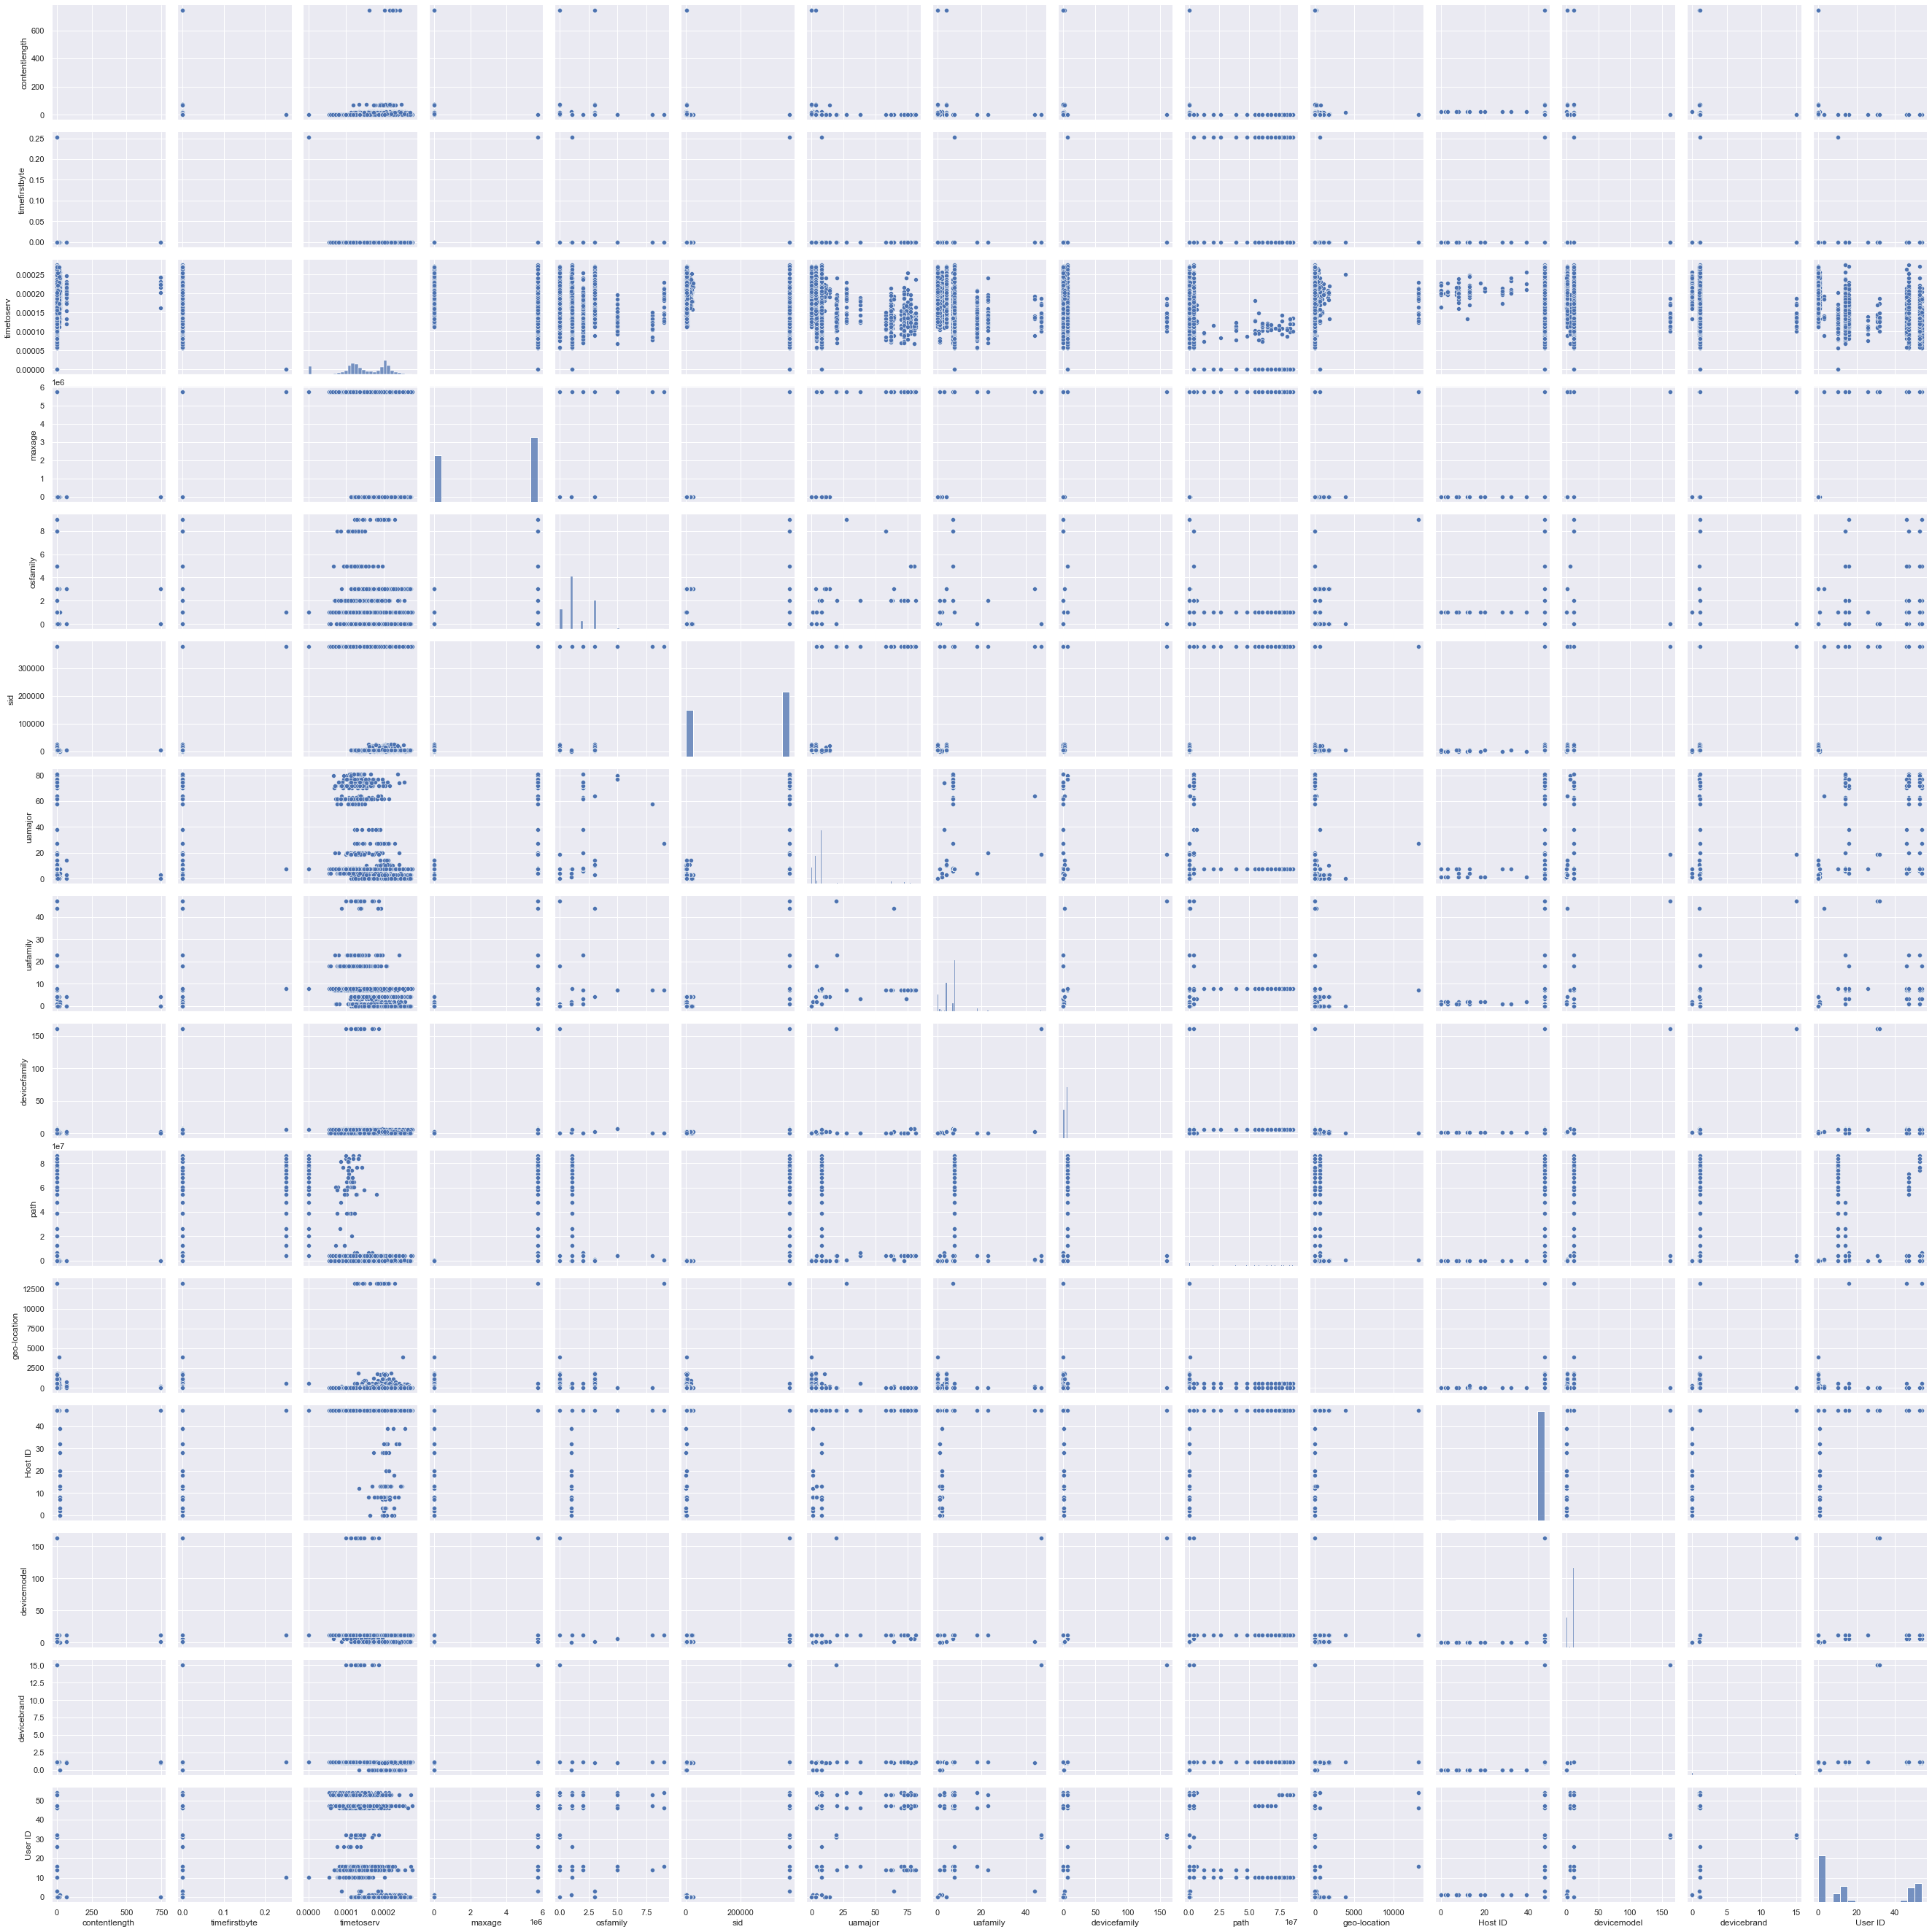

In [78]:
tempdf = updated_df7[['contentlength','timefirstbyte','timetoserv','maxage','osfamily','sid','uamajor','uafamily','devicefamily','path','geo-location','Host ID','devicemodel','devicebrand','User ID']]

sns.pairplot(tempdf, palette='bright')

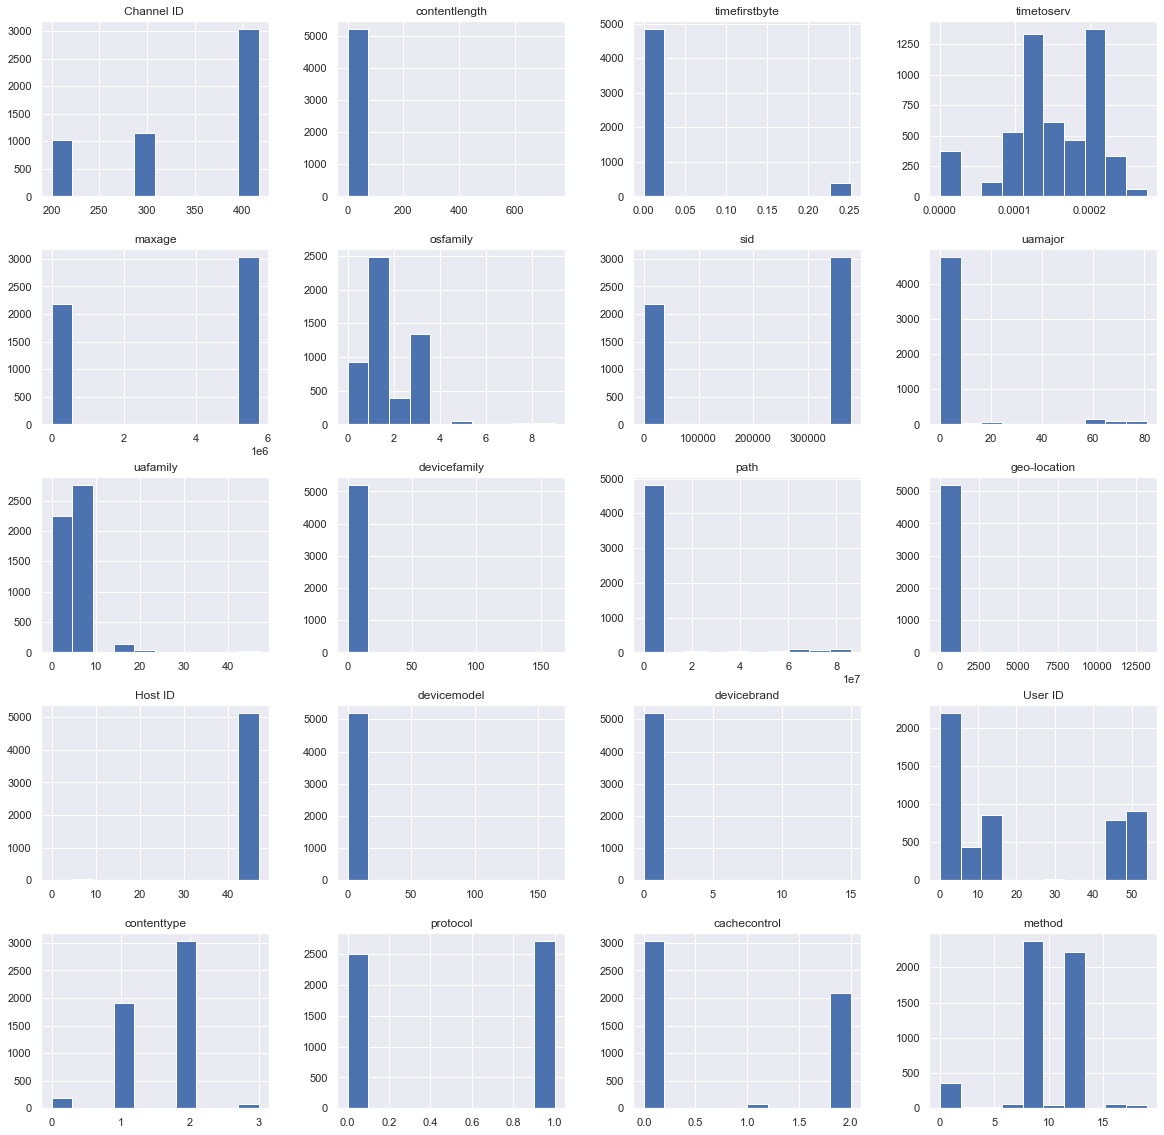

In [79]:
# Plot histograms of each parameter 
updated_df7.hist(figsize = (20, 20))
plt.show()

In [80]:
from sklearn.preprocessing import OneHotEncoder
updated_df8=pd.get_dummies(data=updated_df6, columns=['Channel ID ','contentlength','timefirstbyte','timetoserv','maxage','osfamily','sid','uamajor','uafamily','devicefamily','path','geo-location','Host ID','devicemodel','devicebrand','User ID'])

In [187]:
updated_df9=pd.concat([updated_df8,updated_df5], axis='columns')
updated_df9

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
7                    1                0                0                0   
10                   1                0                0                0   
12                   0                0                0                1   
21                   0                0                0                1   
23                   0                0                0                1   
...                ...              ...              ...              ...   
30332                0                0                0                1   
30341                1                0                0                0   
30342                0                0                0                1   
30349                0                0                1                0   
30363                0                0                0                1   

       Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
7                    0                  0                          0   
10                   0                  0                          0   
12                   0                  0                          0   
21                   0                  0                          0   
23                   0                  0                          0   
...                ...                ...                        ...   
30332                0                  0                          0   
30341                0                  0                          0   
30342                0                  0                          0   
30349                0                  1                          0   
30363                0                  0                          0   

       contentlength_0.523809524  contentlength_2.904761905  \
7                              0                          0   
10                             0                          0   
12                             0                          0   
21                             0                          0   
23                             0                          0   
...                          ...                        ...   
30332                          0                          0   
30341                          0                          0   
30342                          0                          0   
30349                          0                          0   
30363                          0                          0   

       contentlength_3.047619048  ...  User ID_31.0  User ID_32.0  \
7                              0  ...             0             0   
10                             0  ...             0             0   
12                             1  ...             0             0   
21                             1  ...             0             0   
23                             1  ...             0             0   
...                          ...  ...           ...           ...   
30332                          1  ...             0             0   
30341                          0  ...             0             0   
30342                          1  ...             0             0   
30349                          0  ...             0             0   
30363                          1  ...             0             0   

       User ID_46.0  User ID_47.0  User ID_53.0  User ID_54.0  contenttype  \
7                 0             0             0             0            3   
10                0             0             0             0            1   
12                0             0             1             0            2   
21                0             1             0             0            2   
23                0             0             1             0            2   
...             ...           ...           ...           ...          ...   
30332             0             0             0             0            2   
30341  

In [188]:
updated_df9.describe()

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
count      5207.000000      5207.000000      5207.000000      5207.000000   
mean          0.196082         0.222585         0.068754         0.509314   
std           0.397070         0.416022         0.253059         0.499961   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         1.000000   
75%           0.000000         0.000000         0.000000         1.000000   
max           1.000000         1.000000         1.000000         1.000000   

       Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
count      5207.000000        5207.000000                5207.000000   
mean          0.003265           0.324179                   0.026887   
std           0.057051           0.468112                   0.161768   
min           0.000000           0.000000                   0.000000   
25%           0.000000           0.000000                   0.000000   
50%           0.000000           0.000000                   0.000000   
75%           0.000000           1.000000                   0.000000   
max           1.000000           1.000000                   1.000000   

       contentlength_0.523809524  contentlength_2.904761905  \
count                5207.000000                5207.000000   
mean                    0.003841                   0.004609   
std                     0.061862                   0.067741   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       contentlength_3.047619048  ...  User ID_31.0  User ID_32.0  \
count                5207.000000  ...   5207.000000   5207.000000   
mean                    0.479739  ...      0.001536      0.002497   
std                     0.499637  ...      0.039170      0.049909   
min                     0.000000  ...      0.000000      0.000000   
25%                     0.000000  ...      0.000000      0.000000   
50%                     0.000000  ...      0.000000      0.000000   
75%                     1.000000  ...      0.000000      0.000000   
max                     1.000000  ...      1.000000      1.000000   

       User ID_46.0  User ID_47.0  User ID_53.0  User ID_54.0  contenttype  \
count   5207.000000   5207.000000   5207.000000   5207.000000  5207.000000   
mean       0.019973      0.132514      0.149030      0.024582     1.579412   
std        0.139921      0.339081      0.356152      0.154863     0.589789   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%        0.000000      0.000000      0.000000      0.000000     1.000000   
50%        0.000000      0.000000      0.000000      0.000000     2.000000   
75%        0.000000      0.000000      0.000000      0.000000     2.000000   
max        1.000000      1.000000      1.000000      1.000000     3.000000   

          protocol  cachecontrol       method  
count  5207.000000   5207.000000  5207.000000  
mean      0.519109      0.820626     9.366430  
std       0.499683      0.975346     3.393709  
min       0.000000      0.000000     0.000000  
25%       0.000000      0.000000     8.000000  
50%       1.000000      0.000000     8.000000  
75%       1.000000      2.000000    12.000000  
max       1.000000      2.000000    19.000000  

[8 rows x 1097 columns]

In [189]:
# MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_chosen)
data_chosen = pd.DataFrame(np_scaled, columns=data_chosen.columns)

In [190]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

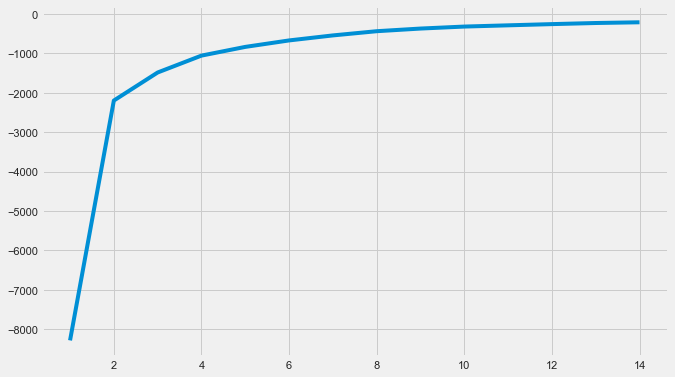

In [191]:
# To detect optimal number of clusters, here I plot elbow curve

n_cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i, random_state=42).fit(data_chosen) for i in n_cluster]
scores = [kmeans[i].score(data_chosen) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [192]:
# Assigning cluster number to each data point

cluster_model = kmeans[1]
updated_df9['cluster'] = cluster_model.predict(data_chosen)
updated_df9['cluster'].value_counts()

1    3027
0    2180
Name: cluster, dtype: int64

In [193]:
# Visualising multidimensional data in 2D plane

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=500, random_state=42)
tsne_results = tsne.fit_transform(data_chosen)
updated_df9['tsne-2d-one'] = tsne_results[:,0]
updated_df9['tsne-2d-two'] = tsne_results[:,1]

In [194]:
updated_df9.isnull().values.any()

False

In [195]:
# Finding cluster centroids 

tsne_cluster = updated_df9.groupby('cluster').agg({'tsne-2d-one':'mean', 'tsne-2d-two':'mean'}).reset_index()

In [196]:
updated_df9.isnull().values.any()

False

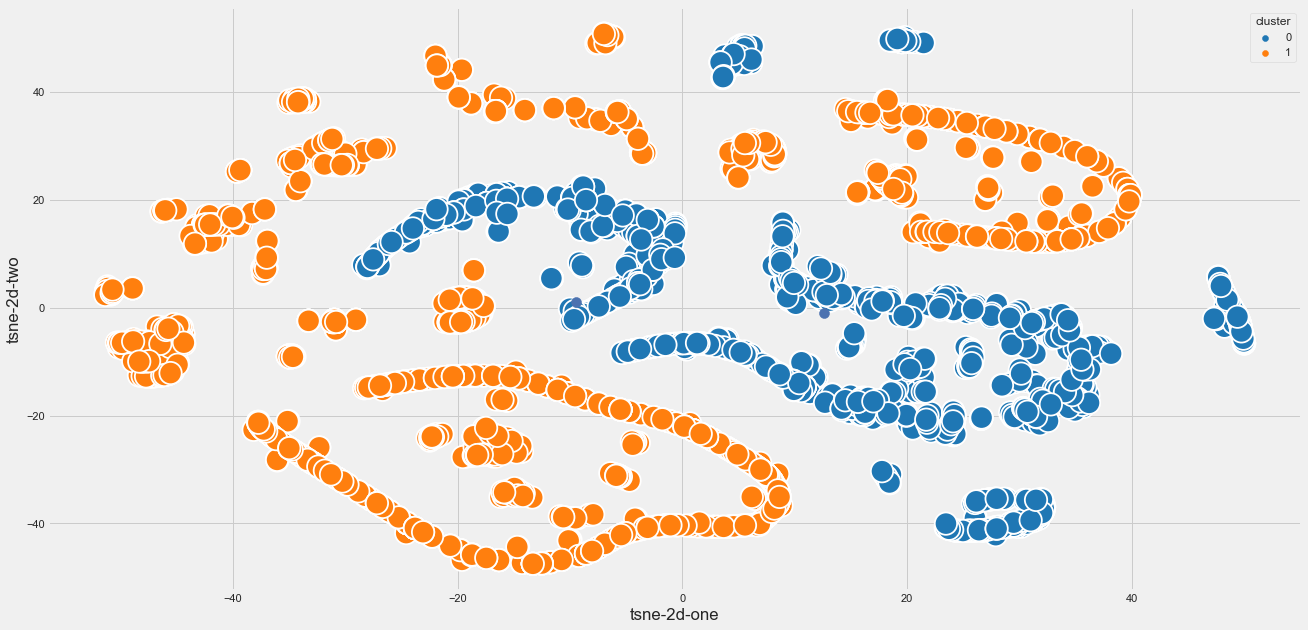

In [197]:
# Plotting 2D Scatterplot visualisation coloured according to cluster

plt.figure(figsize=(20,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=updated_df9,
    hue="cluster",
    palette=sns.color_palette("tab10", 2),
    legend="full",
    alpha=1,
    s=500
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

In [198]:
# Function to calculate sum of squared distance between each data point and centroid

def get_sum_square_distance(data, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(data[data_chosen.columns])
    total_distance = pd.Series(dtype='float64')
    for i in range(len(points)):
        distance = 0
        for j in range(len(centers)):
            a = np.linalg.norm(points[i] - centers[j])
            distance += a**2
        total_distance.at[i]= distance
    
    return total_distance

updated_df9['ssd'] = get_sum_square_distance(data_chosen, cluster_model)

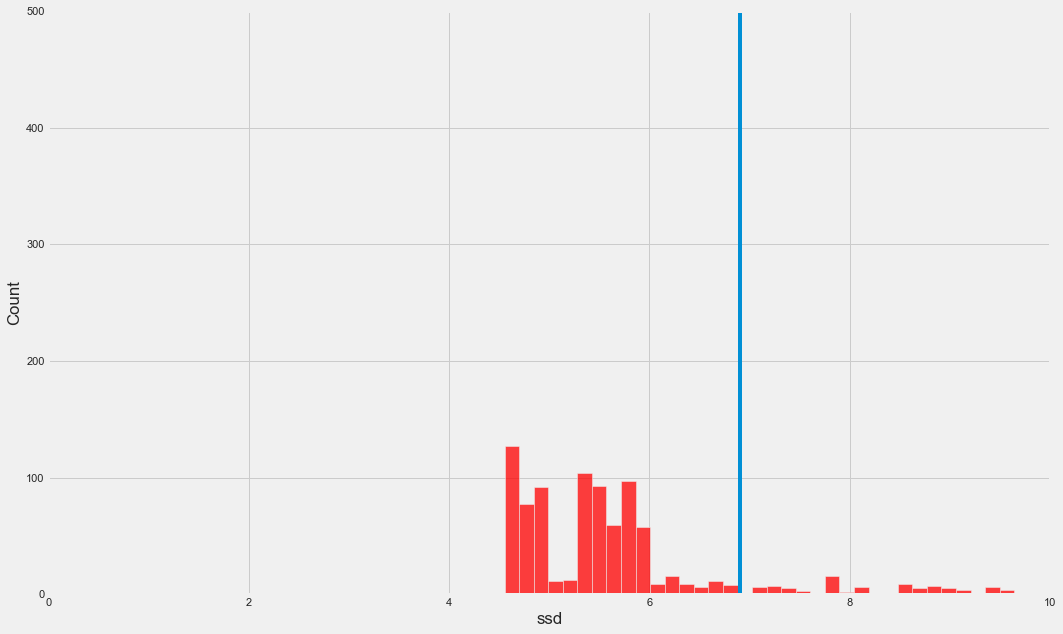

In [199]:
# Ploting histogram on sum of squared distance to find cutoff for anomalous requests

plt.figure(figsize=(16,10))
histo = sns.histplot(data=updated_df9,x="ssd",bins=50,color='red')
histo.set(xlim=(0,10),ylim=(0,500))
plt.axvline(6.9, 0, label="Cutoff")

In [200]:
# Labelling KMean Anomalies 

cutoff = 6.9
updated_df9['anomaly_kmeans'] = (updated_df9['ssd'] >= cutoff).astype(int)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

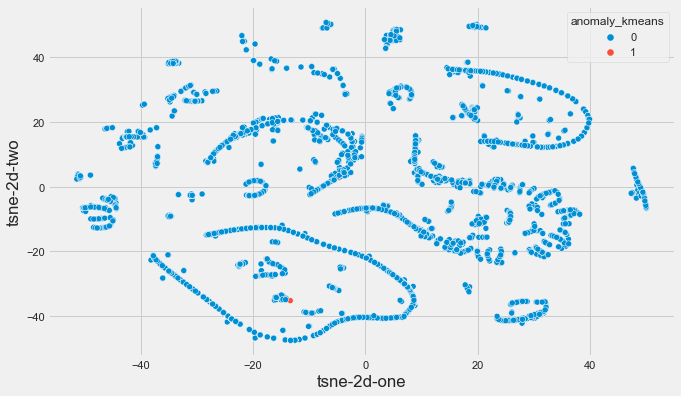

In [201]:
# Scatterplot visualisation of anomalous requests

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [202]:
len(updated_df9[updated_df9['anomaly_kmeans']==1])

95

In [203]:
updated_df9

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
7                    1                0                0                0   
10                   1                0                0                0   
12                   0                0                0                1   
21                   0                0                0                1   
23                   0                0                0                1   
...                ...              ...              ...              ...   
30332                0                0                0                1   
30341                1                0                0                0   
30342                0                0                0                1   
30349                0                0                1                0   
30363                0                0                0                1   

       Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
7                    0                  0                          0   
10                   0                  0                          0   
12                   0                  0                          0   
21                   0                  0                          0   
23                   0                  0                          0   
...                ...                ...                        ...   
30332                0                  0                          0   
30341                0                  0                          0   
30342                0                  0                          0   
30349                0                  1                          0   
30363                0                  0                          0   

       contentlength_0.523809524  contentlength_2.904761905  \
7                              0                          0   
10                             0                          0   
12                             0                          0   
21                             0                          0   
23                             0                          0   
...                          ...                        ...   
30332                          0                          0   
30341                          0                          0   
30342                          0                          0   
30349                          0                          0   
30363                          0                          0   

       contentlength_3.047619048  ...  User ID_54.0  contenttype  protocol  \
7                              0  ...             0            3         1   
10                             0  ...             0            1         1   
12                             1  ...             0            2         1   
21                             1  ...             0            2         0   
23                             1  ...             0            2         0   
...                          ...  ...           ...          ...       ...   
30332                          1  ...             0            2         0   
30341                          0  ...             0            1         1   
30342                          1  ...             0            2         0   
30349                          0  ...             0            2         0   
30363                          1  ...             0            2         1   

       cachecontrol  method  cluster  tsne-2d-one  tsne-2d-two       ssd  \
7                 1       8        0     5.456582    46.674320  4.700498   
10                2       8        0   -23.618454    14.893322  5.564771   
12                0      12        1   -34.825027    26.885992  5.561615   
21                0      12        1    -5.503129   -18.891224  5.578699   
23                0      12        1    -6.332800   -43.086742  5.590402   
...             ...     ...      ...          ...          ...     

In [204]:
# Estimating fraction of outliers based on KMeans

outlier_fraction = len(updated_df9[updated_df9['anomaly_kmeans']==1])/len(updated_df9)
print(outlier_fraction)

0.018244670635682733


## Isolation forest 

In [205]:
# Generating Isolation Forest model using 1% contamination
outlier_fraction = 0.01
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.01)

In [206]:
model.fit(data_chosen)

IsolationForest(contamination=0.01, max_features=3, n_estimators=200, n_jobs=-1,
                random_state=42)

In [207]:
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))

In [208]:
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    877
1.0      7
Name: anomaly_isolated, dtype: int64

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

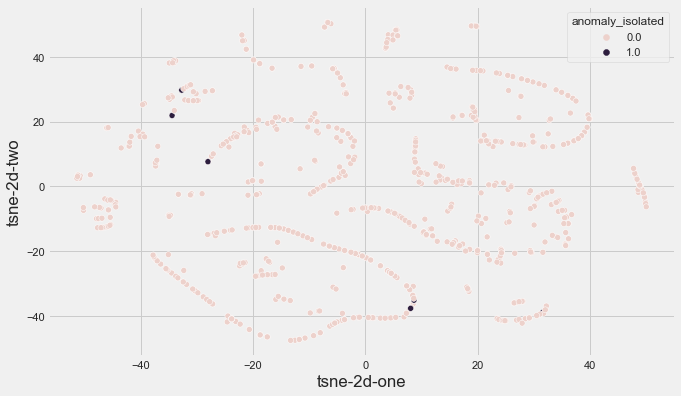

In [209]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [210]:
anomaly=updated_df9['anomaly_isolated']

In [211]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([152, 309, 462, 593, 610, 849, 852], dtype=int64),)

In [212]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
846                 0                0                0                1   
1742                1                0                0                0   
2578                0                0                0                1   
3404                0                0                0                1   
3518                1                0                0                0   
5013                1                0                0                0   
5041                0                0                0                1   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
846                 0                  0                          0   
1742                0                  0                          0   
2578                0                  0                          0   
3404                0                  0                          0   
3518                0                  0                          0   
5013                0                  0                          0   
5041                0                  0                          0   

      contentlength_0.523809524  contentlength_2.904761905  \
846                           0                          0   
1742                          0                          0   
2578                          0                          0   
3404                          0                          0   
3518                          0                          0   
5013                          0                          0   
5041                          0                          0   

      contentlength_3.047619048  ...  contenttype  protocol  cachecontrol  \
846                           1  ...            2         1             0   
1742                          0  ...            1         1             2   
2578                          1  ...            2         0             0   
3404                          1  ...            2         1             0   
3518                          0  ...            1         1             2   
5013                          0  ...            1         1             2   
5041                          1  ...            2         0             0   

      method  cluster  tsne-2d-one  tsne-2d-two       ssd  anomaly_kmeans  \
846       12        1   -34.399376    21.886839  6.584620               0   
1742       8        0    31.545500   -38.869061  6.239776               0   
2578      12        1     8.652698   -35.085125  6.423671               0   
3404      12        1   -32.676075    29.700062  6.597156               0   
3518       8        0    -1.876763     9.024463  6.639012               0   
5013       8        0   -28.011883     7.645115  6.688806               0   
5041      12        1     8.058091   -37.596661  6.414335               0   

      anomaly_isolated  
846                1.0  
1742               1.0  
2578               1.0  
3404               1.0  
3518               1.0  
5013               1.0  
5041               1.0  

[7 rows x 1103 columns]

## Local Outlier Filter

In [213]:
from sklearn.neighbors import LocalOutlierFactor
# model specification
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.01, novelty=True)# model fitting

In [214]:
model1.fit(data_chosen)

LocalOutlierFactor(contamination=0.01, metric='euclidean', novelty=True)

In [215]:
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))

In [216]:
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    876
1.0      8
Name: anomaly_isolated, dtype: int64

In [217]:
anomaly=updated_df9['anomaly_isolated']

In [218]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([407, 419, 461, 503, 567, 627, 643, 866], dtype=int64),)

In [219]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
2273                0                0                0                1   
2344                0                0                0                1   
2576                0                0                0                1   
2837                0                0                0                1   
3262                0                0                0                1   
3615                1                0                0                0   
3774                0                0                1                0   
5108                1                0                0                0   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
2273                0                  1                          0   
2344                0                  0                          0   
2576                0                  0                          0   
2837                0                  0                          0   
3262                0                  0                          0   
3615                0                  0                          0   
3774                0                  1                          0   
5108                0                  0                          1   

      contentlength_0.523809524  contentlength_2.904761905  \
2273                          0                          0   
2344                          0                          0   
2576                          0                          0   
2837                          0                          0   
3262                          0                          0   
3615                          0                          1   
3774                          0                          0   
5108                          0                          0   

      contentlength_3.047619048  ...  contenttype  protocol  cachecontrol  \
2273                          0  ...            2         0             0   
2344                          1  ...            2         0             0   
2576                          1  ...            2         0             0   
2837                          1  ...            2         0             0   
3262                          1  ...            2         0             0   
3615                          0  ...            0         1             2   
3774                          0  ...            2         0             0   
5108                          0  ...            0         1             2   

      method  cluster  tsne-2d-one  tsne-2d-two       ssd  anomaly_kmeans  \
2273       9        1   -17.646702   -22.303841  8.686298               1   
2344      12        1   -26.909386   -14.444489  7.917853               1   
2576      12        1   -30.724134   -31.630861  7.758798               1   
2837      12        1     6.879469   -40.251465  7.917853               1   
3262      12        1    36.908432    27.168926  9.511901               1   
3615       8        0    47.949825     4.030717  7.861280               1   
3774       0        1    -3.430339    28.894331  7.758798               1   
5108       8        0    48.354218     2.211102  7.861280               1   

      anomaly_isolated  
2273               1.0  
2344               1.0  
2576               1.0  
2837               1.0  
3262               1.0  
3615               1.0  
3774               1.0  
5108               1.0  

[8 rows x 1103 columns]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

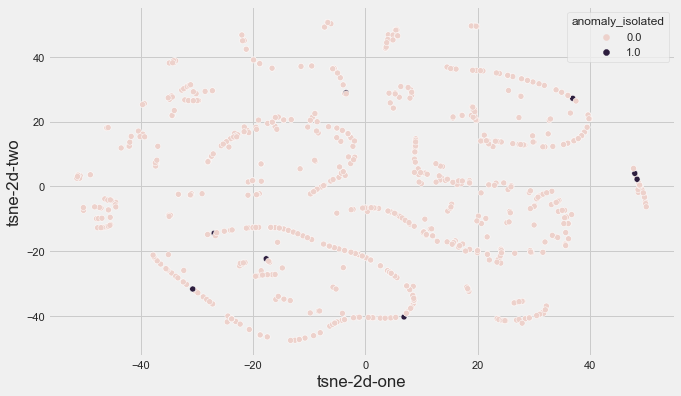

In [220]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 2% contamination

In [221]:
# Generating Isolation Forest model using 2% contamination
outlier_fraction = 0.02
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.02)

In [222]:
model.fit(data_chosen)

IsolationForest(contamination=0.02, max_features=3, n_estimators=200, n_jobs=-1,
                random_state=42)

In [223]:
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))

In [224]:
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    873
1.0     11
Name: anomaly_isolated, dtype: int64

In [225]:
anomaly=updated_df9['anomaly_isolated']

In [226]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([119, 152, 309, 428, 462, 534, 593, 610, 849, 852, 863], dtype=int64),)

In [227]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
674                 0                0                0                1   
846                 0                0                0                1   
1742                1                0                0                0   
2394                1                0                0                0   
2578                0                0                0                1   
3101                1                0                0                0   
3404                0                0                0                1   
3518                1                0                0                0   
5013                1                0                0                0   
5041                0                0                0                1   
5103                0                0                0                1   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
674                 0                  0                          0   
846                 0                  0                          0   
1742                0                  0                          0   
2394                0                  0                          0   
2578                0                  0                          0   
3101                0                  0                          0   
3404                0                  0                          0   
3518                0                  0                          0   
5013                0                  0                          0   
5041                0                  0                          0   
5103                0                  0                          0   

      contentlength_0.523809524  contentlength_2.904761905  \
674                           0                          0   
846                           0                          0   
1742                          0                          0   
2394                          0                          0   
2578                          0                          0   
3101                          0                          0   
3404                          0                          0   
3518                          0                          0   
5013                          0                          0   
5041                          0                          0   
5103                          0                          0   

      contentlength_3.047619048  ...  contenttype  protocol  cachecontrol  \
674                           1  ...            2         0             0   
846                           1  ...            2         1             0   
1742                          0  ...            1         1             2   
2394                          0  ...            1         1             2   
2578                          1  ...            2         0             0   
3101                          0  ...            3         1             1   
3404                          1  ...            2         1             0   
3518                          0  ...            1         1             2   
5013                          0  ...            1         1             2   
5041                          1  ...            2         0             0   
5103                          1  ...            2         0             0   

      method  cluster  tsne-2d-one  tsne-2d-two        ssd  anomaly_kmeans  \
674       12        1    -5.700958   -31.108885   6.591642               0   
846       12        1   -34.399376    21.886839   6.584620               0   
1742       8        0    31.545500   -38.869061   6.239776               0   
2394       8        0   -27.364330     9.315219  11.772695               1   
2578      12        1     8.652698   -35.085125   6.423671               0   
3101       8        0     5.615887    48.257259   5.610596               0   
3404      12        1   

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

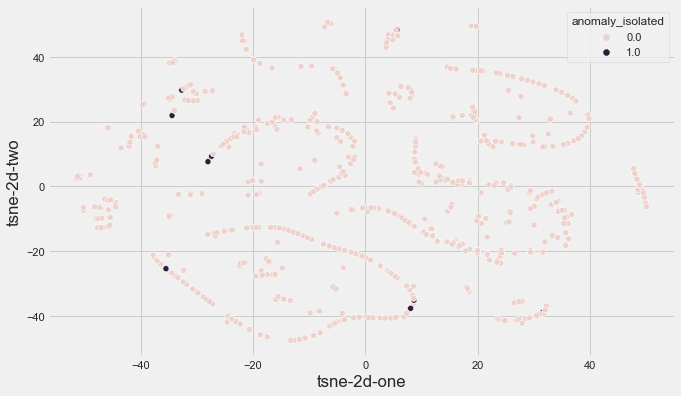

In [228]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [229]:
#LOF

In [230]:
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.02, novelty=True)# model fitting

In [231]:
model1.fit(data_chosen)

LocalOutlierFactor(contamination=0.02, metric='euclidean', novelty=True)

In [232]:
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))

In [233]:
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    863
1.0     21
Name: anomaly_isolated, dtype: int64

In [234]:
anomaly=updated_df9['anomaly_isolated']

In [235]:
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([ 51,  72, 107, 228, 364, 407, 419, 433, 461, 503, 546, 567, 599,
        627, 643, 654, 713, 812, 823, 866, 869], dtype=int64),)

In [236]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
291                 0                1                0                0   
417                 1                0                0                0   
616                 0                1                0                0   
1268                0                0                0                1   
2023                0                0                0                1   
2273                0                0                0                1   
2344                0                0                0                1   
2430                0                0                0                1   
2576                0                0                0                1   
2837                0                0                0                1   
3149                0                0                0                1   
3262                0                0                0                1   
3434                0                0                0                1   
3615                1                0                0                0   
3774                0                0                1                0   
3854                0                1                0                0   
4138                0                0                0                1   
4803                0                0                0                1   
4858                1                0                0                0   
5108                1                0                0                0   
5130                1                0                0                0   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
291                 0                  1                          0   
417                 0                  0                          0   
616                 0                  1                          0   
1268                0                  0                          0   
2023                0                  0                          0   
2273                0                  1                          0   
2344                0                  0                          0   
2430                0                  0                          0   
2576                0                  0                          0   
2837                0                  0                          0   
3149                0                  0                          0   
3262                0                  0                          0   
3434                0                  1                          0   
3615                0                  0                          0   
3774                0                  1                          0   
3854                0                  1                          0   
4138                0                  0                          0   
4803                0                  0                          0   
4858                0                  0                          0   
5108                0                  0                          1   
5130                0                  0                          0   

      contentlength_0.523809524  contentlength_2.904761905  \
291                           0                          0   
417                           0                          0   
616                           0                          0   
1268                          0                          0   
2023                          0                          0   
2273                          0                          0   
2344                          0                          0   
2430                          0                          0   
2576                          0                          0   
2837                          0                          0   
3149                          0                          0   
3262                      

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

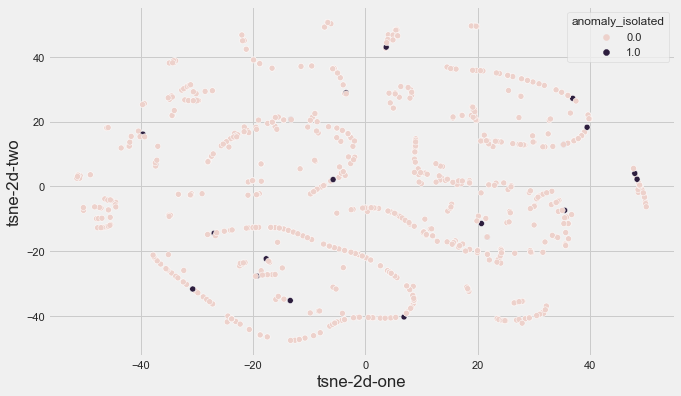

In [237]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 3% contamination

In [ ]:
#IF

In [239]:
# Generating Isolation Forest model using 2% contamination
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.03)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

In [240]:
updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    863
1.0     21
Name: anomaly_isolated, dtype: int64

In [241]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([119, 127, 152, 245, 255, 309, 328, 407, 419, 428, 462, 503, 534,
        567, 593, 610, 696, 738, 849, 852, 863], dtype=int64),)

In [242]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
674                 0                0                0                1   
717                 0                0                0                1   
846                 0                0                0                1   
1384                0                0                0                1   
1432                0                0                0                1   
1742                1                0                0                0   
1837                0                0                0                1   
2273                0                0                0                1   
2344                0                0                0                1   
2394                1                0                0                0   
2578                0                0                0                1   
2837                0                0                0                1   
3101                1                0                0                0   
3262                0                0                0                1   
3404                0                0                0                1   
3518                1                0                0                0   
4056                1                0                0                0   
4361                1                0                0                0   
5013                1                0                0                0   
5041                0                0                0                1   
5103                0                0                0                1   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
674                 0                  0                          0   
717                 0                  0                          0   
846                 0                  0                          0   
1384                0                  0                          0   
1432                0                  0                          0   
1742                0                  0                          0   
1837                0                  1                          0   
2273                0                  1                          0   
2344                0                  0                          0   
2394                0                  0                          0   
2578                0                  0                          0   
2837                0                  0                          0   
3101                0                  0                          0   
3262                0                  0                          0   
3404                0                  0                          0   
3518                0                  0                          0   
4056                0                  0                          0   
4361                0                  0                          0   
5013                0                  0                          0   
5041                0                  0                          0   
5103                0                  0                          0   

      contentlength_0.523809524  contentlength_2.904761905  \
674                           0                          0   
717                           0                          0   
846                           0                          0   
1384                          0                          0   
1432                          0                          0   
1742                          0                          0   
1837                          0                          0   
2273                          0                          0   
2344                          0                          0   
2394                          0                          0   
2578                          0                          0   
2837                      

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

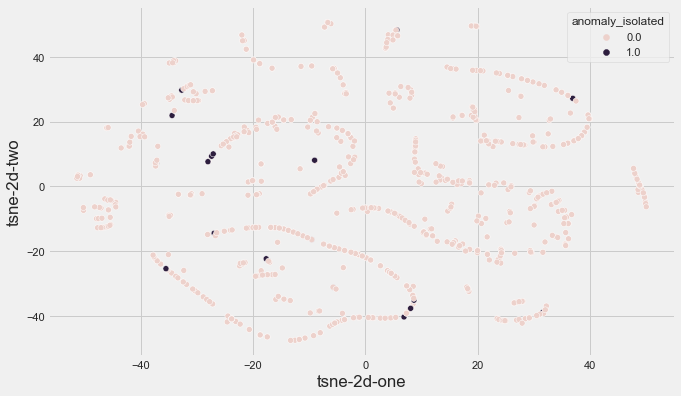

In [243]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)


In [244]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.03, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    859
1.0     25
Name: anomaly_isolated, dtype: int64

In [245]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
291                 0                1                0                0   
417                 1                0                0                0   
616                 0                1                0                0   
1268                0                0                0                1   
2023                0                0                0                1   
2273                0                0                0                1   
2344                0                0                0                1   
2430                0                0                0                1   
2576                0                0                0                1   
2837                0                0                0                1   
2861                0                0                0                1   
3149                0                0                0                1   
3262                0                0                0                1   
3434                0                0                0                1   
3615                1                0                0                0   
3774                0                0                1                0   
3854                0                1                0                0   
4138                0                0                0                1   
4421                0                0                0                1   
4525                0                0                0                1   
4700                0                0                0                1   
4803                0                0                0                1   
4858                1                0                0                0   
5108                1                0                0                0   
5130                1                0                0                0   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
291                 0                  1                          0   
417                 0                  0                          0   
616                 0                  1                          0   
1268                0                  0                          0   
2023                0                  0                          0   
2273                0                  1                          0   
2344                0                  0                          0   
2430                0                  0                          0   
2576                0                  0                          0   
2837                0                  0                          0   
2861                0                  0                          0   
3149                0                  0                          0   
3262                0                  0                          0   
3434                0                  1                          0   
3615                0                  0                          0   
3774                0                  1                          0   
3854                0                  1                          0   
4138                0                  0                          0   
4421                0                  0                          0   
4525                0                  0                          0   
4700                0                  0                          0   
4803                0                  0                          0   
4858                0                  0                          0   
5108                0                  0                          1   
5130                0                  0                          0   

      contentlength_0.523809524  contentlength_2.904761905  \
291                           0                          0   
417                           0                          0

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

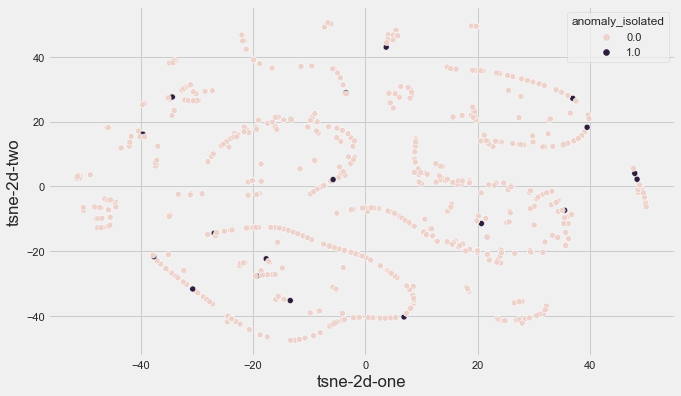

In [246]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 4% contamination

In [247]:
# Generating Isolation Forest model using 2% contamination
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.04)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    858
1.0     26
Name: anomaly_isolated, dtype: int64

In [248]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([ 72, 119, 127, 152, 245, 255, 309, 328, 407, 419, 428, 433, 462,
        503, 534, 567, 593, 610, 627, 696, 713, 738, 849, 852, 863, 866],
       dtype=int64),)

In [249]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
417                 1                0                0                0   
674                 0                0                0                1   
717                 0                0                0                1   
846                 0                0                0                1   
1384                0                0                0                1   
1432                0                0                0                1   
1742                1                0                0                0   
1837                0                0                0                1   
2273                0                0                0                1   
2344                0                0                0                1   
2394                1                0                0                0   
2430                0                0                0                1   
2578                0                0                0                1   
2837                0                0                0                1   
3101                1                0                0                0   
3262                0                0                0                1   
3404                0                0                0                1   
3518                1                0                0                0   
3615                1                0                0                0   
4056                1                0                0                0   
4138                0                0                0                1   
4361                1                0                0                0   
5013                1                0                0                0   
5041                0                0                0                1   
5103                0                0                0                1   
5108                1                0                0                0   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
417                 0                  0                          0   
674                 0                  0                          0   
717                 0                  0                          0   
846                 0                  0                          0   
1384                0                  0                          0   
1432                0                  0                          0   
1742                0                  0                          0   
1837                0                  1                          0   
2273                0                  1                          0   
2344                0                  0                          0   
2394                0                  0                          0   
2430                0                  0                          0   
2578                0                  0                          0   
2837                0                  0                          0   
3101                0                  0                          0   
3262                0                  0                          0   
3404                0                  0                          0   
3518                0                  0                          0   
3615                0                  0                          0   
4056                0                  0                          0   
4138                0                  0                          0   
4361                0                  0                          0   
5013                0                  0                          0   
5041                0                  0                          0   
5103                0                  0                          0   
5108                0                  0                          1   

      contentlength_0.523809524  co

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

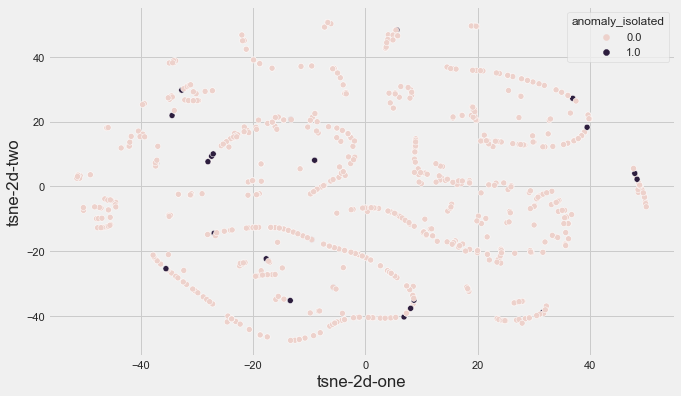

In [250]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [251]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.04, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()


0.0    857
1.0     27
Name: anomaly_isolated, dtype: int64

In [252]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values


Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
291                 0                1                0                0   
417                 1                0                0                0   
616                 0                1                0                0   
1268                0                0                0                1   
2023                0                0                0                1   
2273                0                0                0                1   
2344                0                0                0                1   
2430                0                0                0                1   
2576                0                0                0                1   
2837                0                0                0                1   
2861                0                0                0                1   
3128                0                0                0                1   
3149                0                0                0                1   
3262                0                0                0                1   
3434                0                0                0                1   
3615                1                0                0                0   
3774                0                0                1                0   
3854                0                1                0                0   
3895                1                0                0                0   
4138                0                0                0                1   
4421                0                0                0                1   
4525                0                0                0                1   
4700                0                0                0                1   
4803                0                0                0                1   
4858                1                0                0                0   
5108                1                0                0                0   
5130                1                0                0                0   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
291                 0                  1                          0   
417                 0                  0                          0   
616                 0                  1                          0   
1268                0                  0                          0   
2023                0                  0                          0   
2273                0                  1                          0   
2344                0                  0                          0   
2430                0                  0                          0   
2576                0                  0                          0   
2837                0                  0                          0   
2861                0                  0                          0   
3128                0                  0                          0   
3149                0                  0                          0   
3262                0                  0                          0   
3434                0                  1                          0   
3615                0                  0                          0   
3774                0                  1                          0   
3854                0                  1                          0   
3895                0                  0                          1   
4138                0                  0                          0   
4421                0                  0                          0   
4525                0                  0                          0   
4700                0                  0                          0   
4803                0                  0                          0   
4858                0                  0                          0   
5108                0          

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

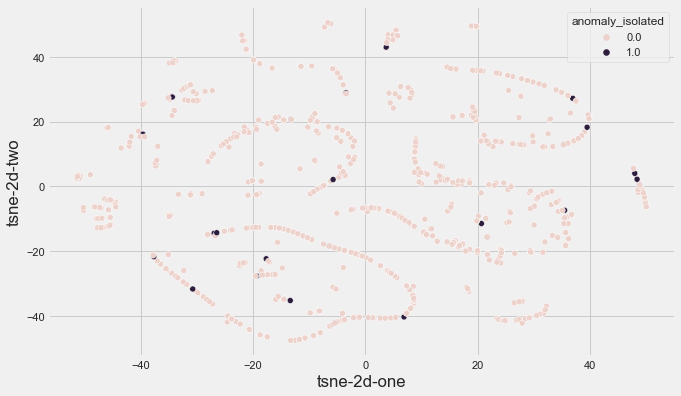

In [253]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 5% contamination

In [255]:
# Generating Isolation Forest model using 2% contamination
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.05)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    845
1.0     39
Name: anomaly_isolated, dtype: int64

In [256]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([ 56,  72, 119, 127, 139, 147, 152, 176, 245, 255, 309, 328, 334,
        407, 419, 420, 428, 433, 462, 483, 503, 534, 557, 567, 593, 610,
        618, 627, 696, 701, 713, 738, 784, 849, 852, 863, 866, 873, 880],
       dtype=int64),)

In [257]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
313                 0                0                1                0   
417                 1                0                0                0   
674                 0                0                0                1   
717                 0                0                0                1   
784                 1                0                0                0   
833                 0                0                0                1   
846                 0                0                0                1   
1015                0                0                0                1   
1384                0                0                0                1   
1432                0                0                0                1   
1742                1                0                0                0   
1837                0                0                0                1   
1877                0                1                0                0   
2273                0                0                0                1   
2344                0                0                0                1   
2353                0                0                0                1   
2394                1                0                0                0   
2430                0                0                0                1   
2578                0                0                0                1   
2721                0                0                0                1   
2837                0                0                0                1   
3101                1                0                0                0   
3201                0                0                0                1   
3262                0                0                0                1   
3404                0                0                0                1   
3518                1                0                0                0   
3568                1                0                0                0   
3615                1                0                0                0   
4056                1                0                0                0   
4095                0                1                0                0   
4138                0                0                0                1   
4361                1                0                0                0   
4611                0                0                1                0   
5013                1                0                0                0   
5041                0                0                0                1   
5103                0                0                0                1   
5108                1                0                0                0   
5159                0                1                0                0   
5190                0                0                0                1   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
313                 0                  1                          0   
417                 0                  0                          0   
674                 0                  0                          0   
717                 0                  0                          0   
784                 0                  0                          0   
833                 0                  0                          0   
846                 0                  0                          0   
1015                0                  0                          0   
1384                0                  0                          0   
1432                0                  0                          0   
1742                0                  0                          0   
1837                0                  1                          0   
1877                0                  1  

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

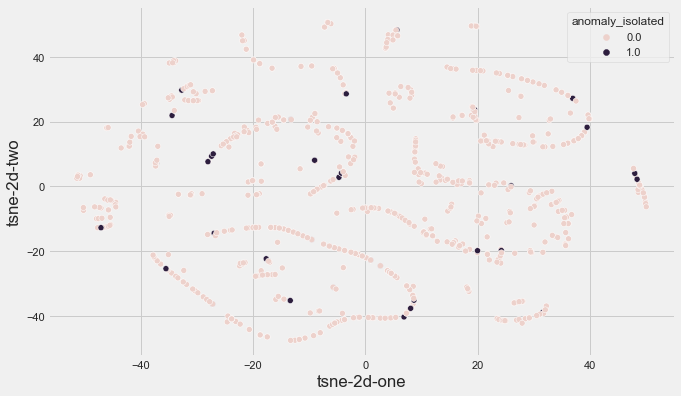

In [258]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

In [259]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.05, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()


0.0    850
1.0     34
Name: anomaly_isolated, dtype: int64

In [260]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values


Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
289                 0                0                0                1   
291                 0                1                0                0   
417                 1                0                0                0   
616                 0                1                0                0   
1268                0                0                0                1   
1276                0                0                0                1   
2023                0                0                0                1   
2273                0                0                0                1   
2344                0                0                0                1   
2430                0                0                0                1   
2576                0                0                0                1   
2586                1                0                0                0   
2837                0                0                0                1   
2861                0                0                0                1   
2869                0                0                0                1   
3128                0                0                0                1   
3149                0                0                0                1   
3262                0                0                0                1   
3270                0                1                0                0   
3434                0                0                0                1   
3543                1                0                0                0   
3615                1                0                0                0   
3774                0                0                1                0   
3854                0                1                0                0   
3895                1                0                0                0   
4138                0                0                0                1   
4421                0                0                0                1   
4525                0                0                0                1   
4700                0                0                0                1   
4803                0                0                0                1   
4858                1                0                0                0   
5062                0                0                0                1   
5108                1                0                0                0   
5130                1                0                0                0   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
289                 0                  0                          0   
291                 0                  1                          0   
417                 0                  0                          0   
616                 0                  1                          0   
1268                0                  0                          0   
1276                0                  0                          0   
2023                0                  0                          0   
2273                0                  1                          0   
2344                0                  0                          0   
2430                0                  0                          0   
2576                0                  0                          0   
2586                0                  0                          0   
2837                0                  0                          0   
2861                0                  0                          0   
2869                0                  0                          0   
3128                0                  0                          0   
3149                0                  0                          0   
3262                0                  0                          0

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

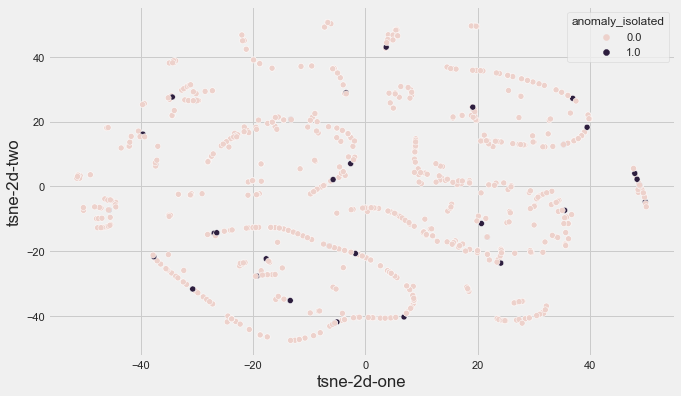

In [261]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)

# 10% contamination

In [262]:
# Generating Isolation Forest model using 2% contamination
outlier_fraction = 0.02
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.10)
model.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model.predict(data_chosen))
# Labelling anomalous requests detected by Isolation Forest 

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()

0.0    801
1.0     83
Name: anomaly_isolated, dtype: int64

In [263]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index

(array([ 18,  23,  51,  56,  72,  79, 107, 119, 122, 127, 139, 147, 152,
        166, 176, 191, 207, 228, 232, 245, 247, 255, 267, 306, 309, 323,
        324, 328, 334, 364, 367, 377, 403, 407, 419, 420, 428, 433, 438,
        440, 441, 461, 462, 479, 483, 503, 523, 534, 542, 546, 553, 557,
        558, 567, 580, 593, 598, 599, 610, 618, 627, 643, 654, 686, 687,
        696, 701, 713, 738, 784, 794, 804, 812, 823, 849, 852, 863, 864,
        866, 869, 873, 875, 880], dtype=int64),)

In [264]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
126                 0                0                0                1   
135                 0                0                0                1   
291                 0                1                0                0   
313                 0                0                1                0   
417                 1                0                0                0   
...               ...              ...              ...              ...   
5108                1                0                0                0   
5130                1                0                0                0   
5159                0                1                0                0   
5170                0                0                1                0   
5190                0                0                0                1   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
126                 0                  0                          0   
135                 0                  0                          0   
291                 0                  1                          0   
313                 0                  1                          0   
417                 0                  0                          0   
...               ...                ...                        ...   
5108                0                  0                          1   
5130                0                  0                          0   
5159                0                  1                          0   
5170                0                  1                          0   
5190                0                  0                          0   

      contentlength_0.523809524  contentlength_2.904761905  \
126                           0                          0   
135                           0                          0   
291                           0                          0   
313                           0                          0   
417                           0                          0   
...                         ...                        ...   
5108                          0                          0   
5130                          0                          0   
5159                          0                          0   
5170                          0                          0   
5190                          0                          0   

      contentlength_3.047619048  ...  contenttype  protocol  cachecontrol  \
126                           1  ...            2         0             0   
135                           1  ...            2         0             0   
291                           0  ...            1         1             2   
313                           0  ...            2         0             0   
417                           0  ...            1         1             2   
...                         ...  ...          ...       ...           ...   
5108                          0  ...            0         1             2   
5130                          0  ...            1         1             2   
5159                          0  ...            1         1             2   
5170                          0  ...            2         0             0   
5190                          1  ...            2         0             0   

      method  cluster  tsne-2d-one  tsne-2d-two       ssd  anomaly_kmeans  \
126       12        1   -23.076733   -41.619987  8.572771               1   
135       12        1   -14.535752   -13.113385  7.804326               1   
291        8        0    21.676449   -15.603364  8.695634               1   
313        0        1    -5.822325    36.288860  8.046711               1   
417        8        0   -13.223941    20.641336  9.501071               1   
...      ...      ...          ...          ...       ...             ...   
5108       8        0    48.354

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

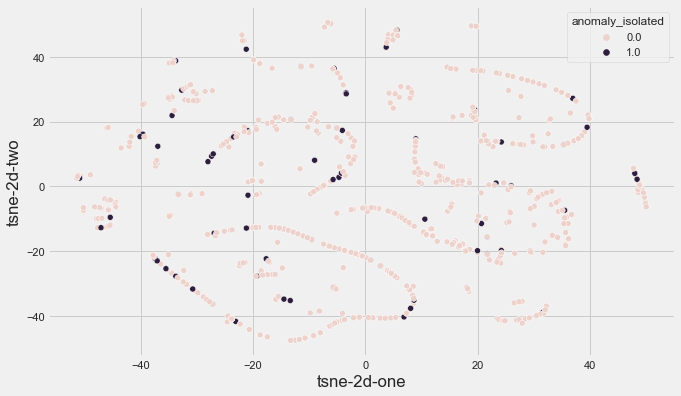

In [265]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)


In [266]:
#LOF
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean", contamination=0.10, novelty=True)# model fitting
model1.fit(data_chosen)
updated_df9['anomaly_isolated'] = pd.Series(model1.predict(data_chosen))
# Labelling anomalous requests detected by LOF

updated_df9['anomaly_isolated'] = updated_df9['anomaly_isolated'].map( {1: 0, -1: 1} )
updated_df9['anomaly_isolated'].value_counts()


0.0    811
1.0     73
Name: anomaly_isolated, dtype: int64

In [267]:
anomaly=updated_df9['anomaly_isolated']
# filter outlier index
from numpy import quantile, random, where
outlier_index = where(anomaly == 1) 
outlier_index
# negative values are outliers and positives inliers# filter outlier values
outlier_values = updated_df9.iloc[outlier_index]
outlier_values

Channel ID _200  Channel ID _304  Channel ID _400  Channel ID _405  \
70                  0                1                0                0   
196                 1                0                0                0   
285                 0                0                0                1   
289                 0                0                0                1   
291                 0                1                0                0   
...               ...              ...              ...              ...   
4918                0                0                1                0   
4978                0                0                1                0   
5062                0                0                0                1   
5108                1                0                0                0   
5130                1                0                0                0   

      Channel ID _417  contentlength_0.0  contentlength_0.238095238  \
70                  0                  1                          0   
196                 0                  0                          0   
285                 0                  0                          0   
289                 0                  0                          0   
291                 0                  1                          0   
...               ...                ...                        ...   
4918                0                  1                          0   
4978                0                  1                          0   
5062                0                  1                          0   
5108                0                  0                          1   
5130                0                  0                          0   

      contentlength_0.523809524  contentlength_2.904761905  \
70                            0                          0   
196                           0                          1   
285                           0                          0   
289                           0                          0   
291                           0                          0   
...                         ...                        ...   
4918                          0                          0   
4978                          0                          0   
5062                          0                          0   
5108                          0                          0   
5130                          0                          0   

      contentlength_3.047619048  ...  contenttype  protocol  cachecontrol  \
70                            0  ...            1         1             2   
196                           0  ...            0         1             2   
285                           1  ...            2         0             0   
289                           1  ...            2         0             0   
291                           0  ...            1         1             2   
...                         ...  ...          ...       ...           ...   
4918                          0  ...            2         0             0   
4978                          0  ...            2         0             0   
5062                          0  ...            2         0             0   
5108                          0  ...            0         1             2   
5130                          0  ...            1         1             2   

      method  cluster  tsne-2d-one  tsne-2d-two       ssd  anomaly_kmeans  \
70         8        0    18.111303   -31.211416  5.787453               0   
196        8        0    48.898968     0.104029  5.601863               0   
285       15        1   -15.938484   -34.851067  5.548144               0   
289       12        1   -45.661217    -7.267152  5.853146               0   
291        8        0    21.676449   -15.603364  8.695634               1   
...      ...      ...          ...          ...       ...             ...   
4918       8        1   -34.685

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

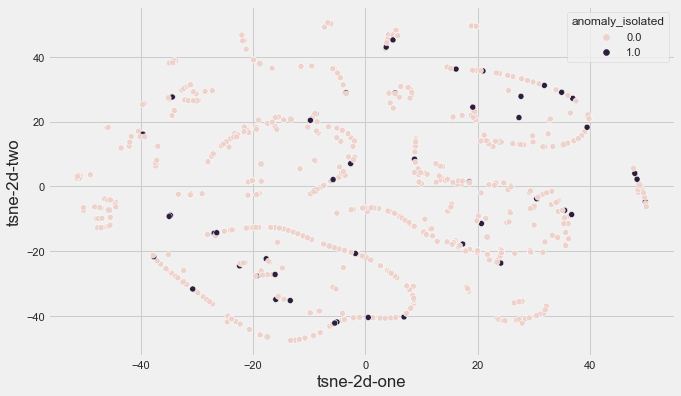

In [268]:
# Scatterplot visualisation 

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=updated_df9,
    legend="full",
    alpha=1
)